In [88]:
#preamble import
from preamble import *

In [89]:
#데이터 준비
data = pd.read_excel('kor_boxoffice.xlsx')

In [90]:
movie = data.dropna()

In [91]:
#데이터 확인
movie.head()

,sales,cost,screen,times,...,news,box-office,length,roi
0,135756027310,19000000000,1587,188668,...,454.0,17615437,128,7.14
1,139647979516,9500000000,2003,292576,...,174.0,16264944,111,14.69
2,115706080137,40000000000,1912,213262,...,244.0,14411502,139,2.89
3,110939497730,18000000000,1044,212683,...,72.0,14263203,126,6.16
4,105169264250,9000000000,1115,199240,...,226.0,13414200,123,11.68


In [92]:
print("데이터의 크기",movie.shape)

데이터의 크기 (195, 12)


In [93]:
print("movie data의 키: ",movie.keys())

movie data의 키:  Index(['sales', 'cost', 'screen ', 'times', 'week', 'rate', 'rate_n', 'c_rate',
       'news', 'box-office', 'length', 'roi'],
      dtype='object')


In [94]:
print('데이터의 키\n')
for i in movie.keys():
    print(i,end=', ')

데이터의 키

sales, cost, screen , times, week, rate, rate_n, c_rate, news, box-office, length, roi, 

In [95]:
print("sales 5개\n",movie['sales'][:5])

sales 5개
 0    135756027310
1    139647979516
2    115706080137
3    110939497730
4    105169264250
Name: sales, dtype: int64


In [96]:
#속성값 확인
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 196
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sales       195 non-null    int64  
 1   cost        195 non-null    int64  
 2   screen      195 non-null    int64  
 3   times       195 non-null    int64  
 4   week        195 non-null    int64  
 5   rate        195 non-null    float64
 6   rate_n      195 non-null    int64  
 7   c_rate      195 non-null    float64
 8   news        195 non-null    float64
 9   box-office  195 non-null    int64  
 10  length      195 non-null    int64  
 11  roi         195 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 19.8 KB


In [97]:
movie.columns

Index(['sales', 'cost', 'screen ', 'times', 'week', 'rate', 'rate_n', 'c_rate',
       'news', 'box-office', 'length', 'roi'],
      dtype='object')

<AxesSubplot:>

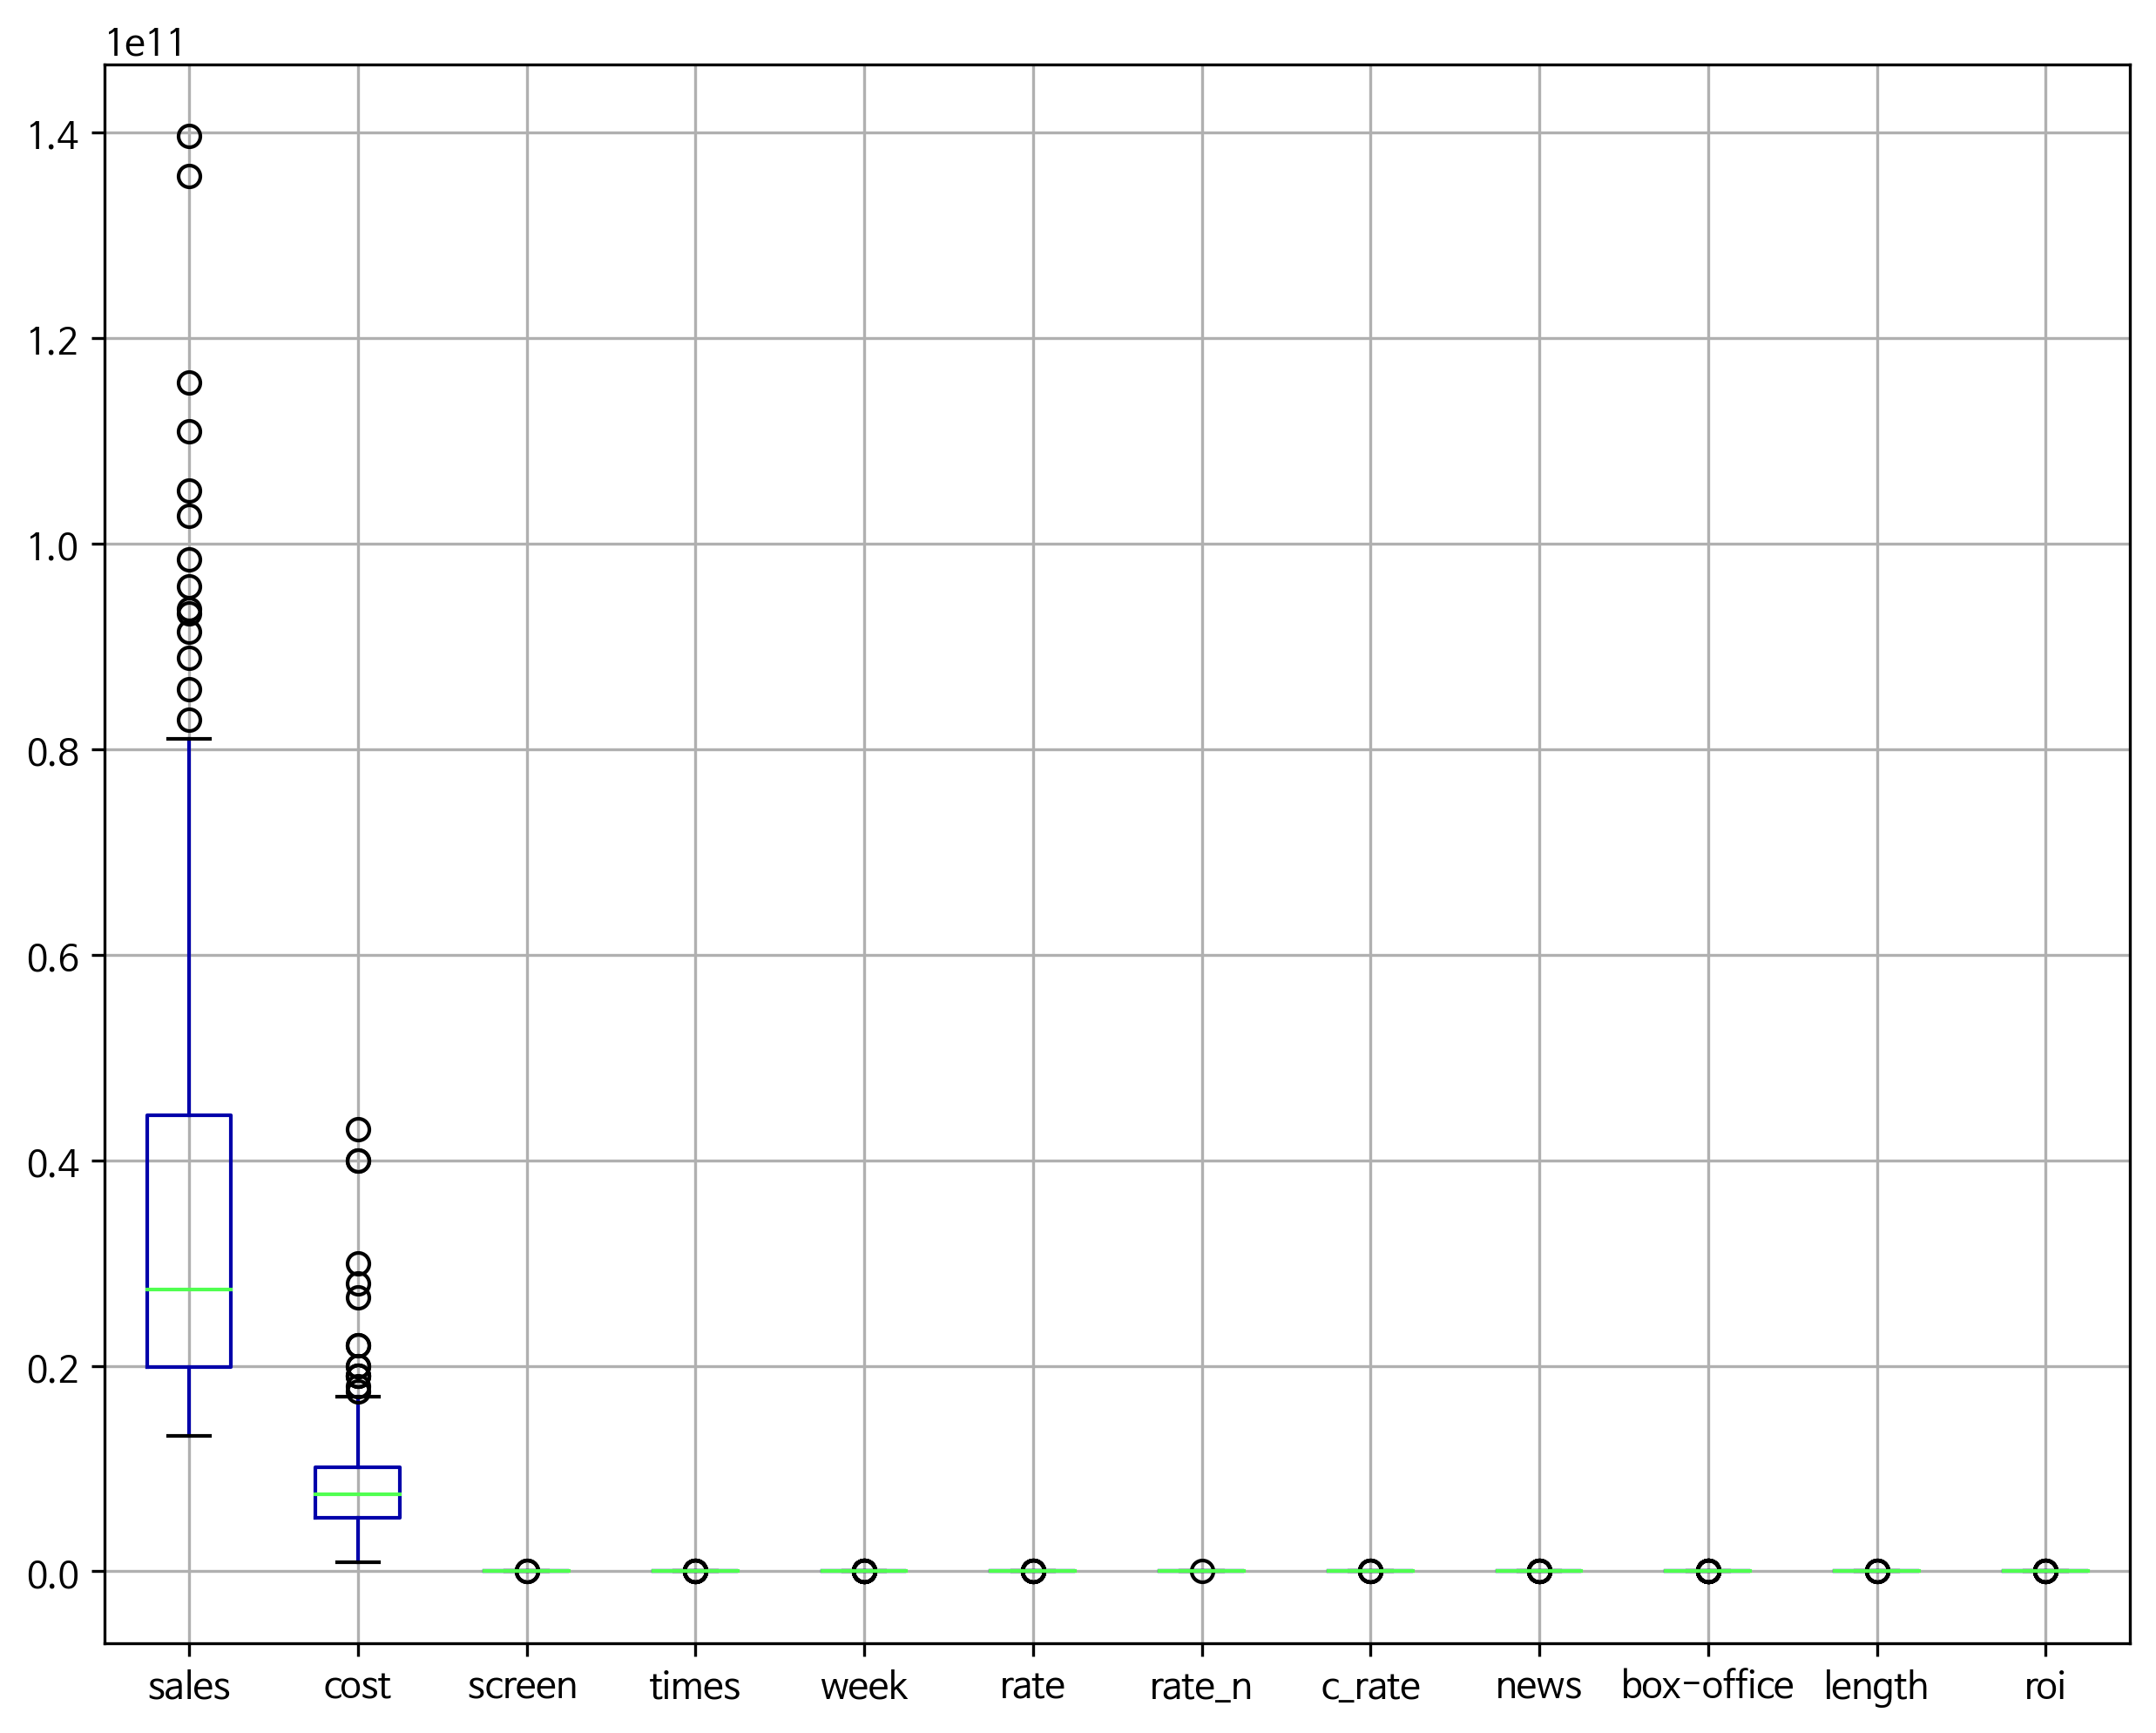

In [98]:
movie.boxplot(figsize = (10,8))

<AxesSubplot:>

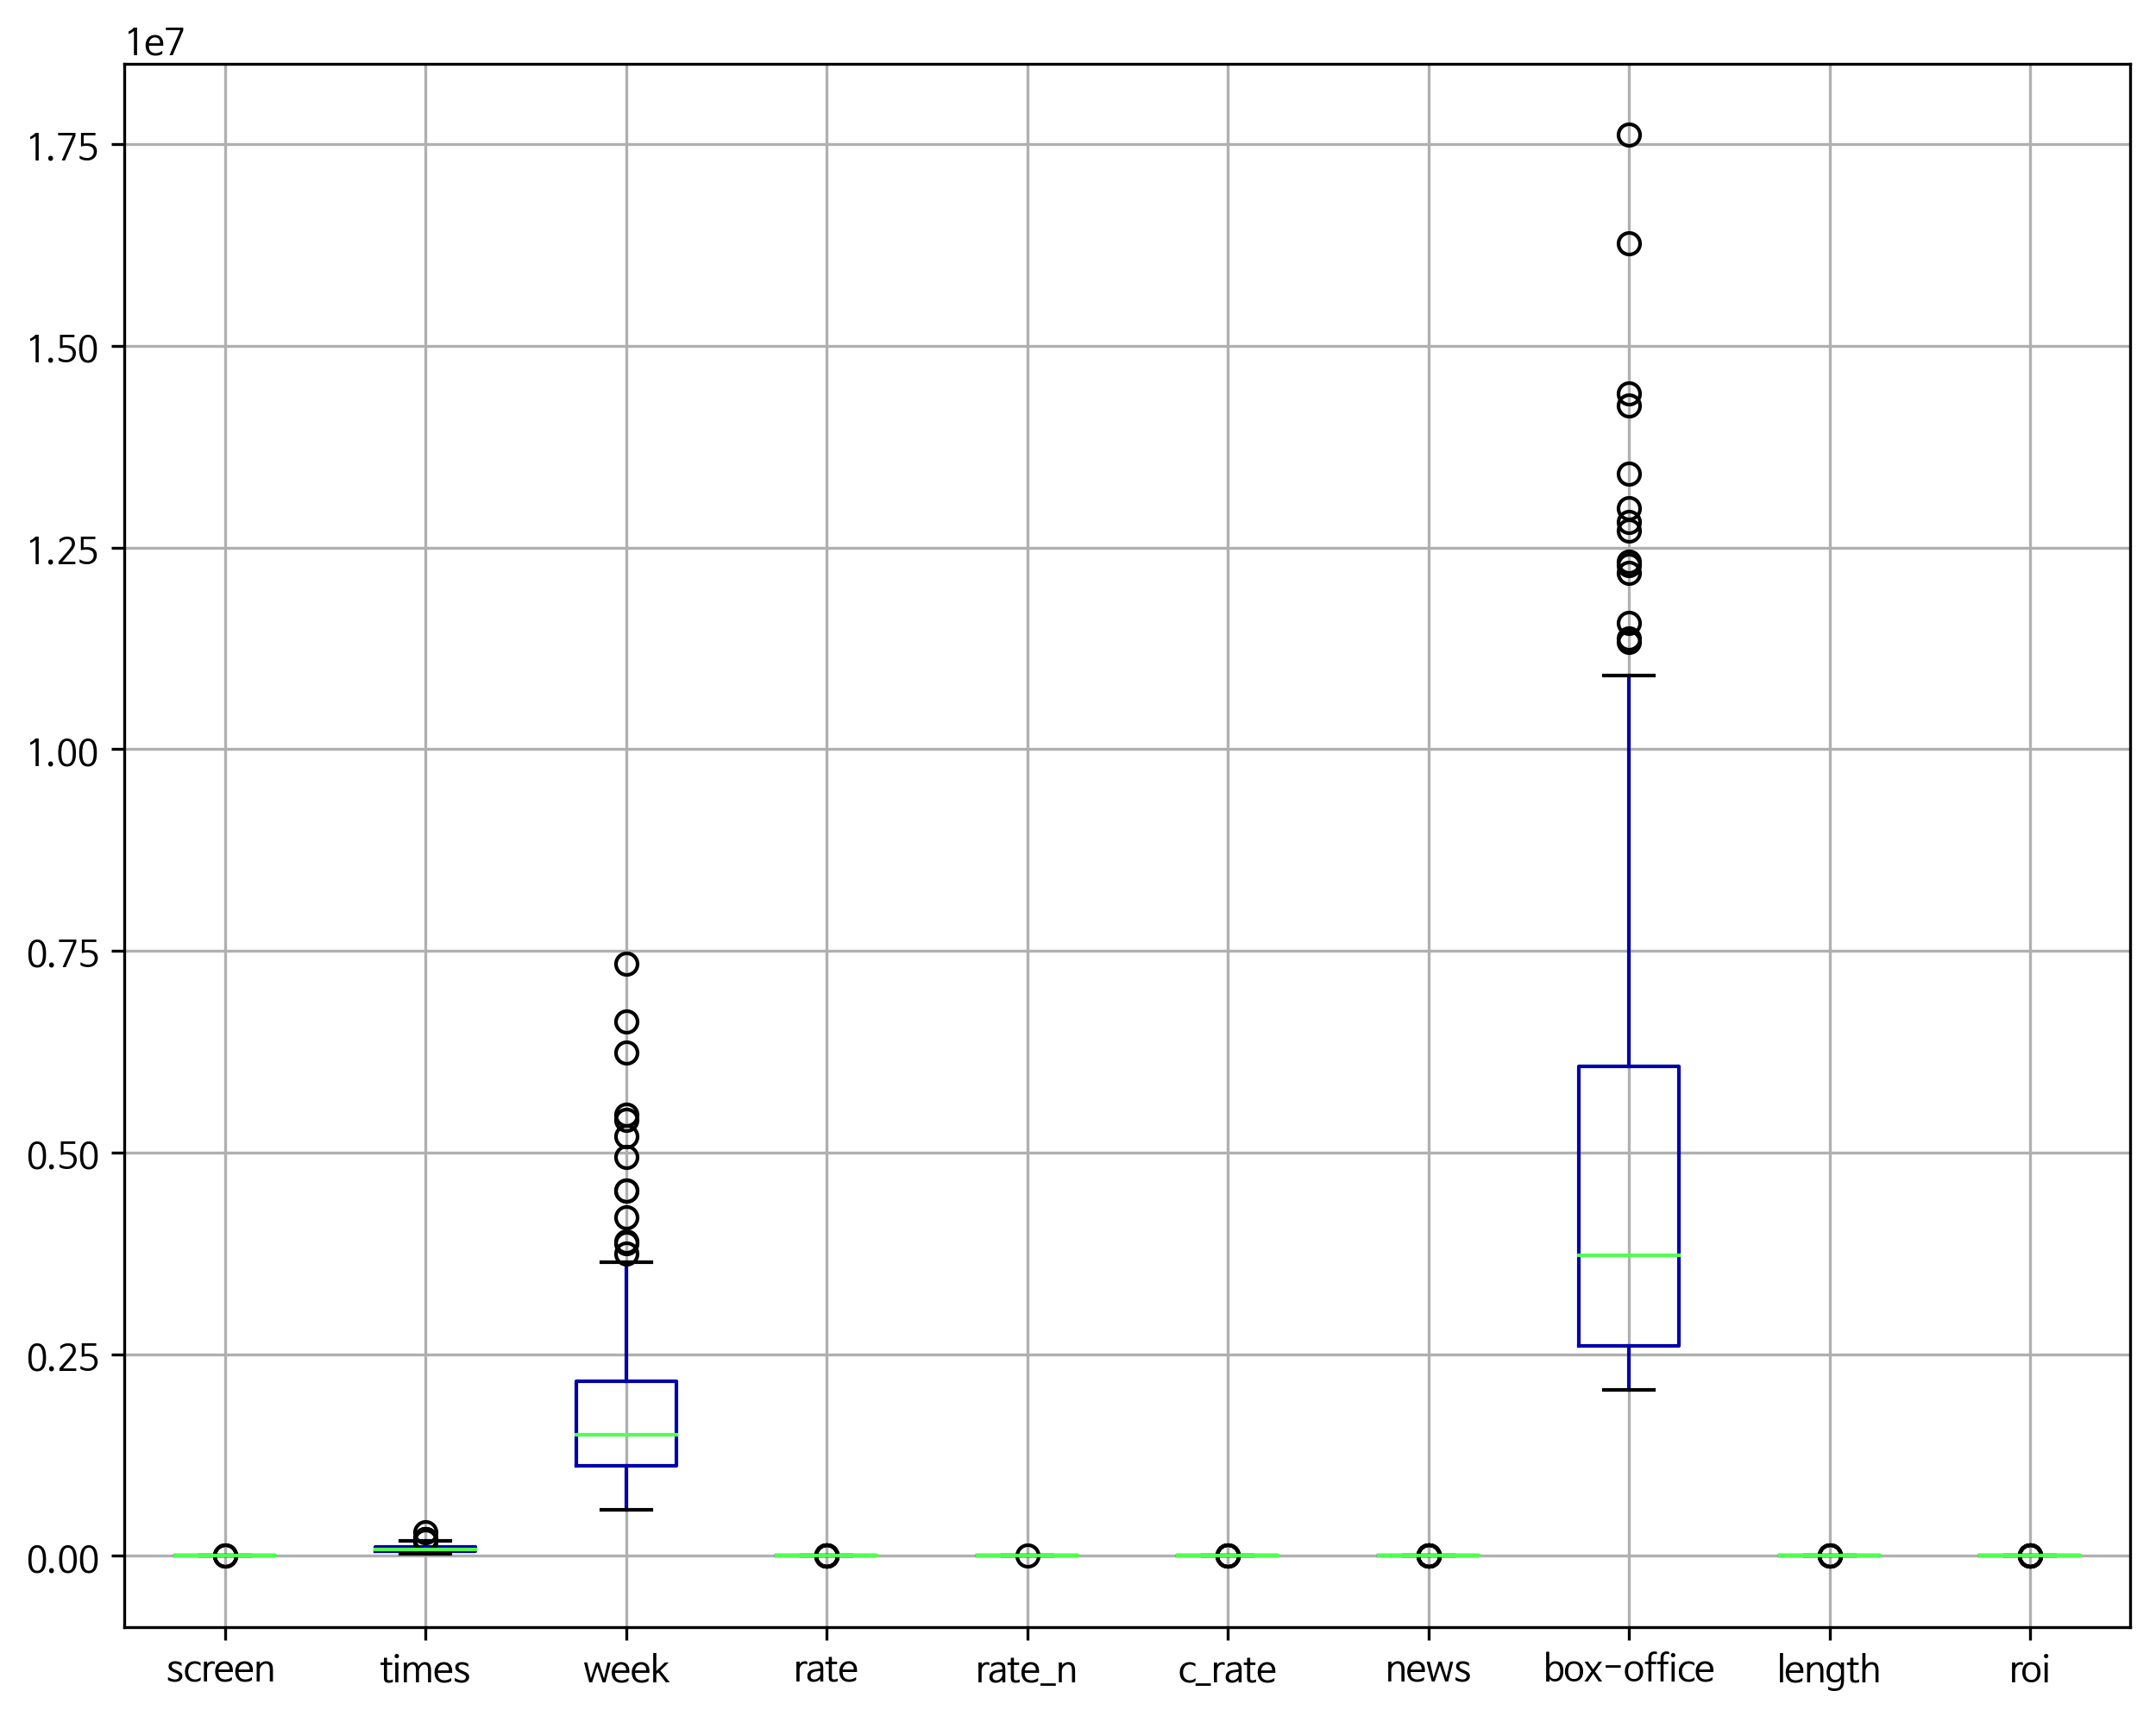

In [99]:
movie.drop(['sales', 'cost'], axis=1).boxplot(figsize = (10,8))


<AxesSubplot:>

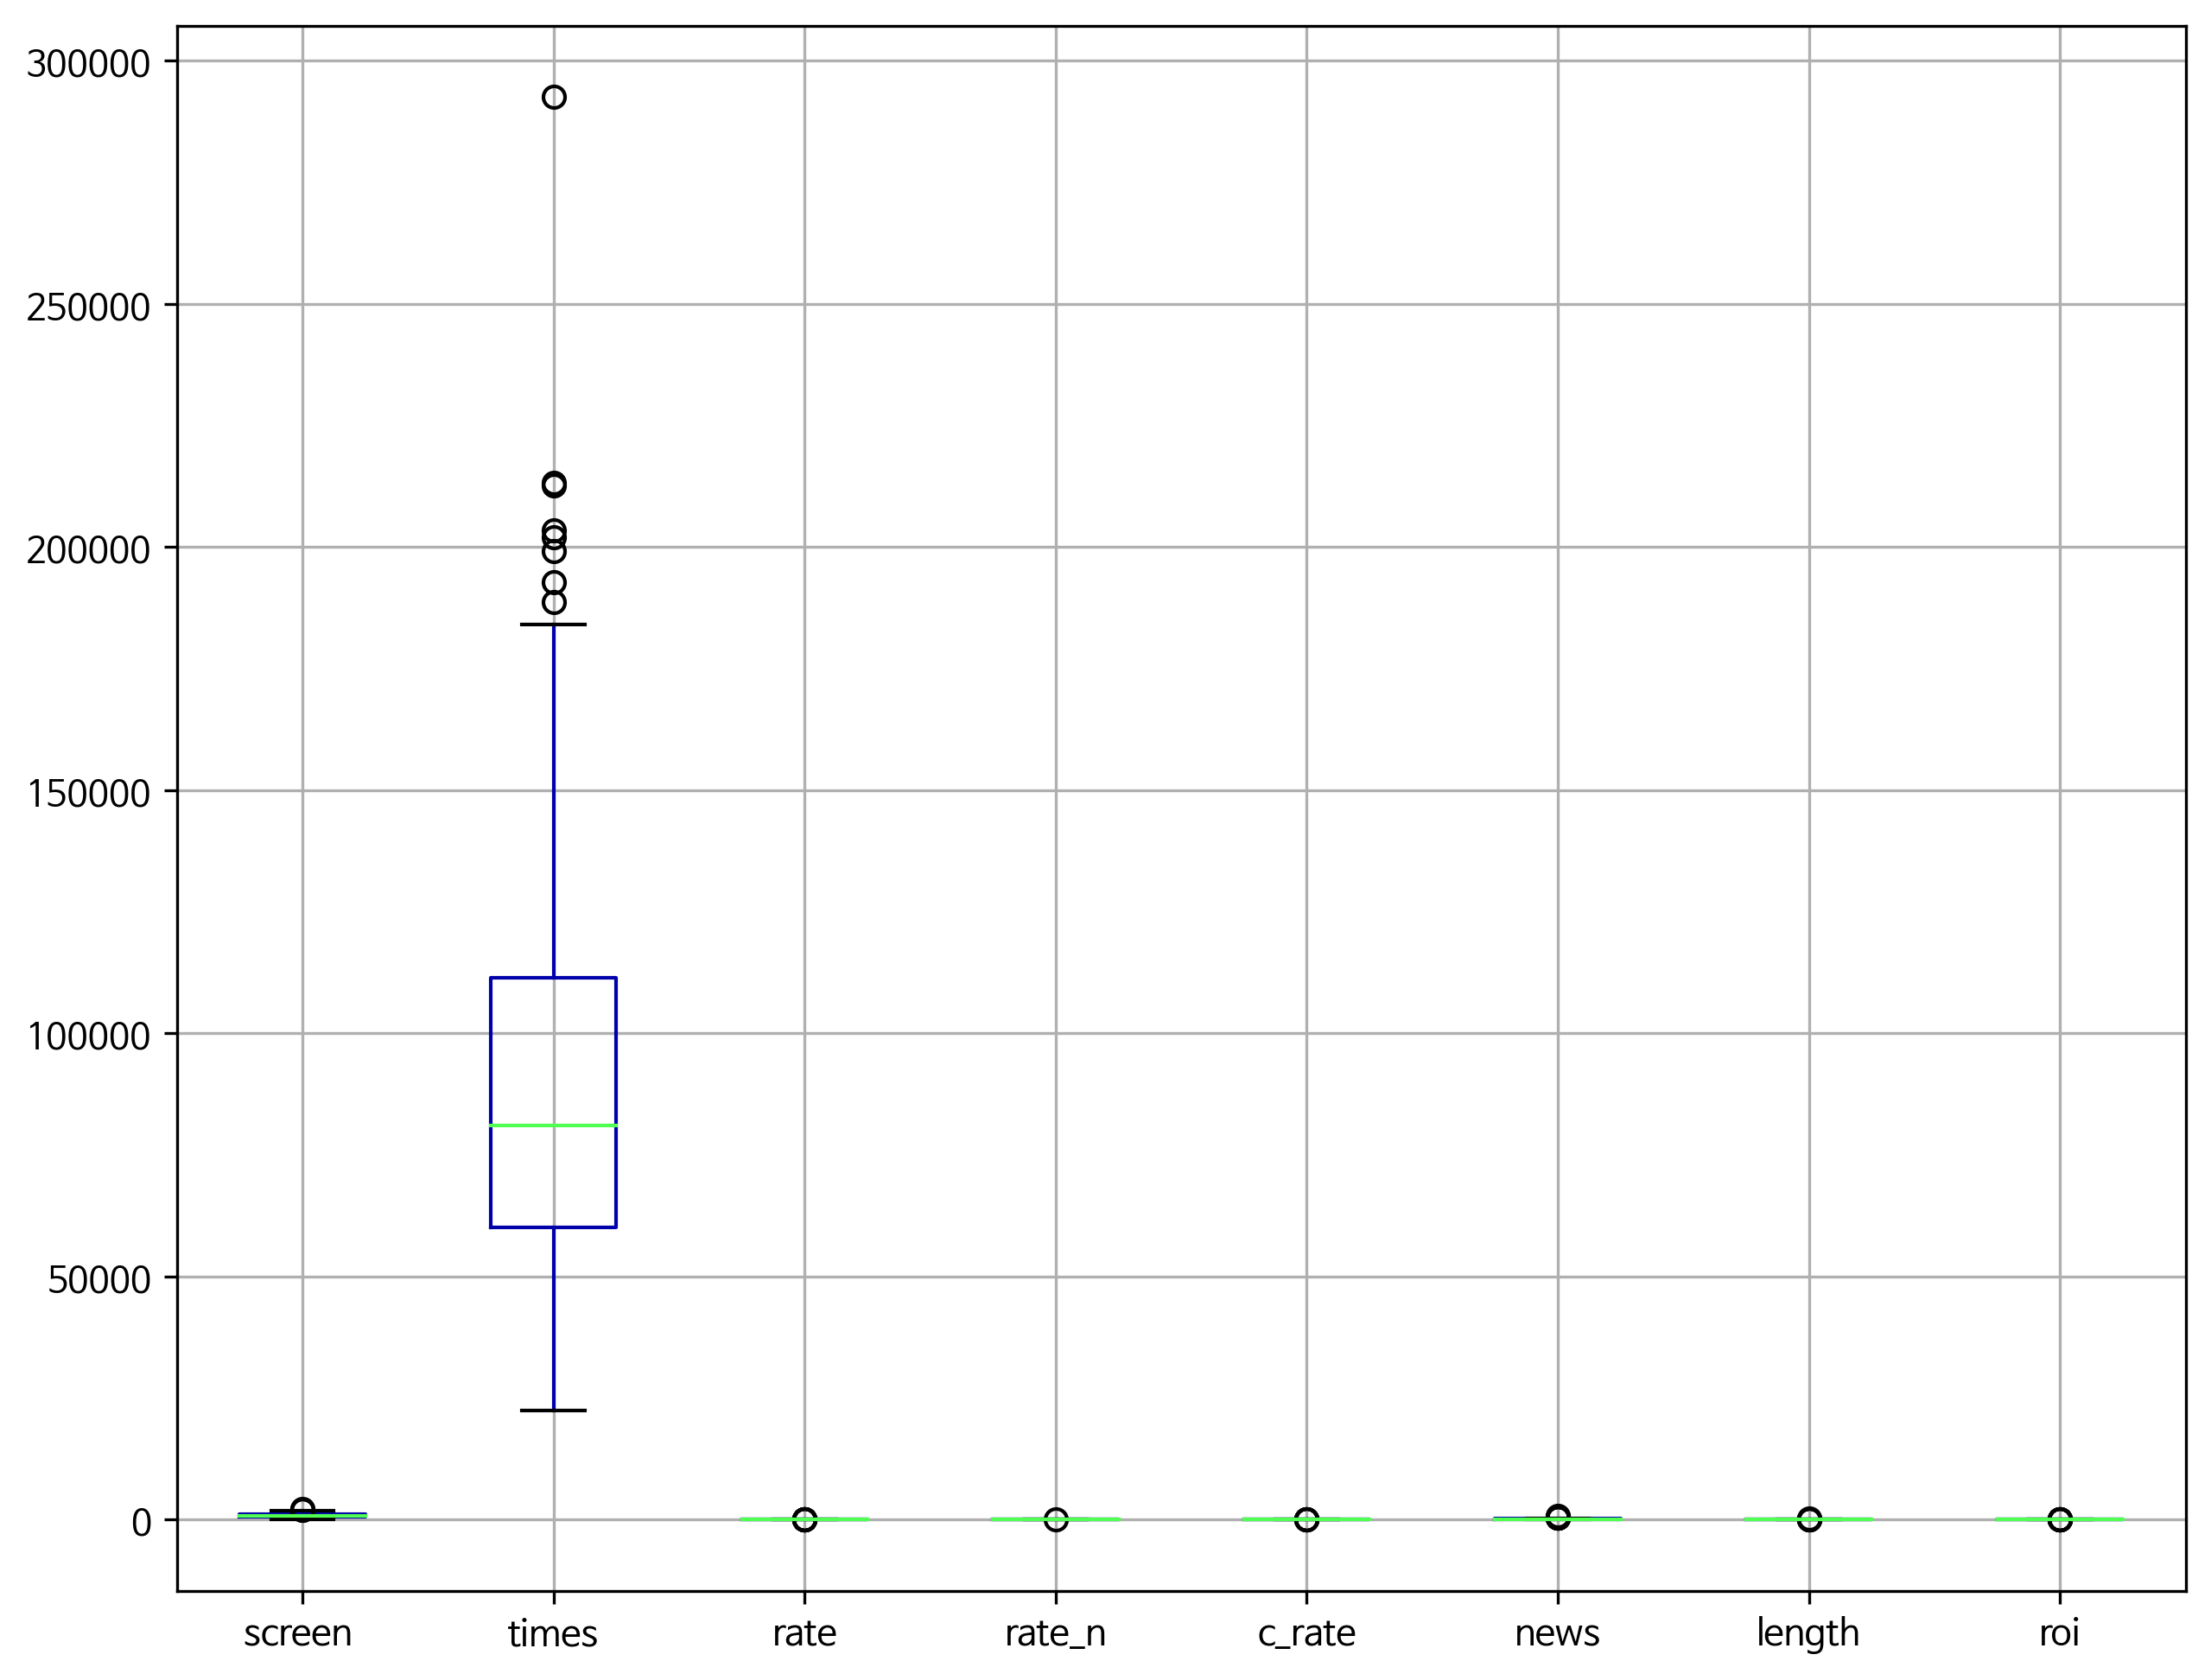

In [100]:
movie.drop(['sales', 'cost','week','box-office'], axis=1).boxplot(figsize = (10,8))

<AxesSubplot:>

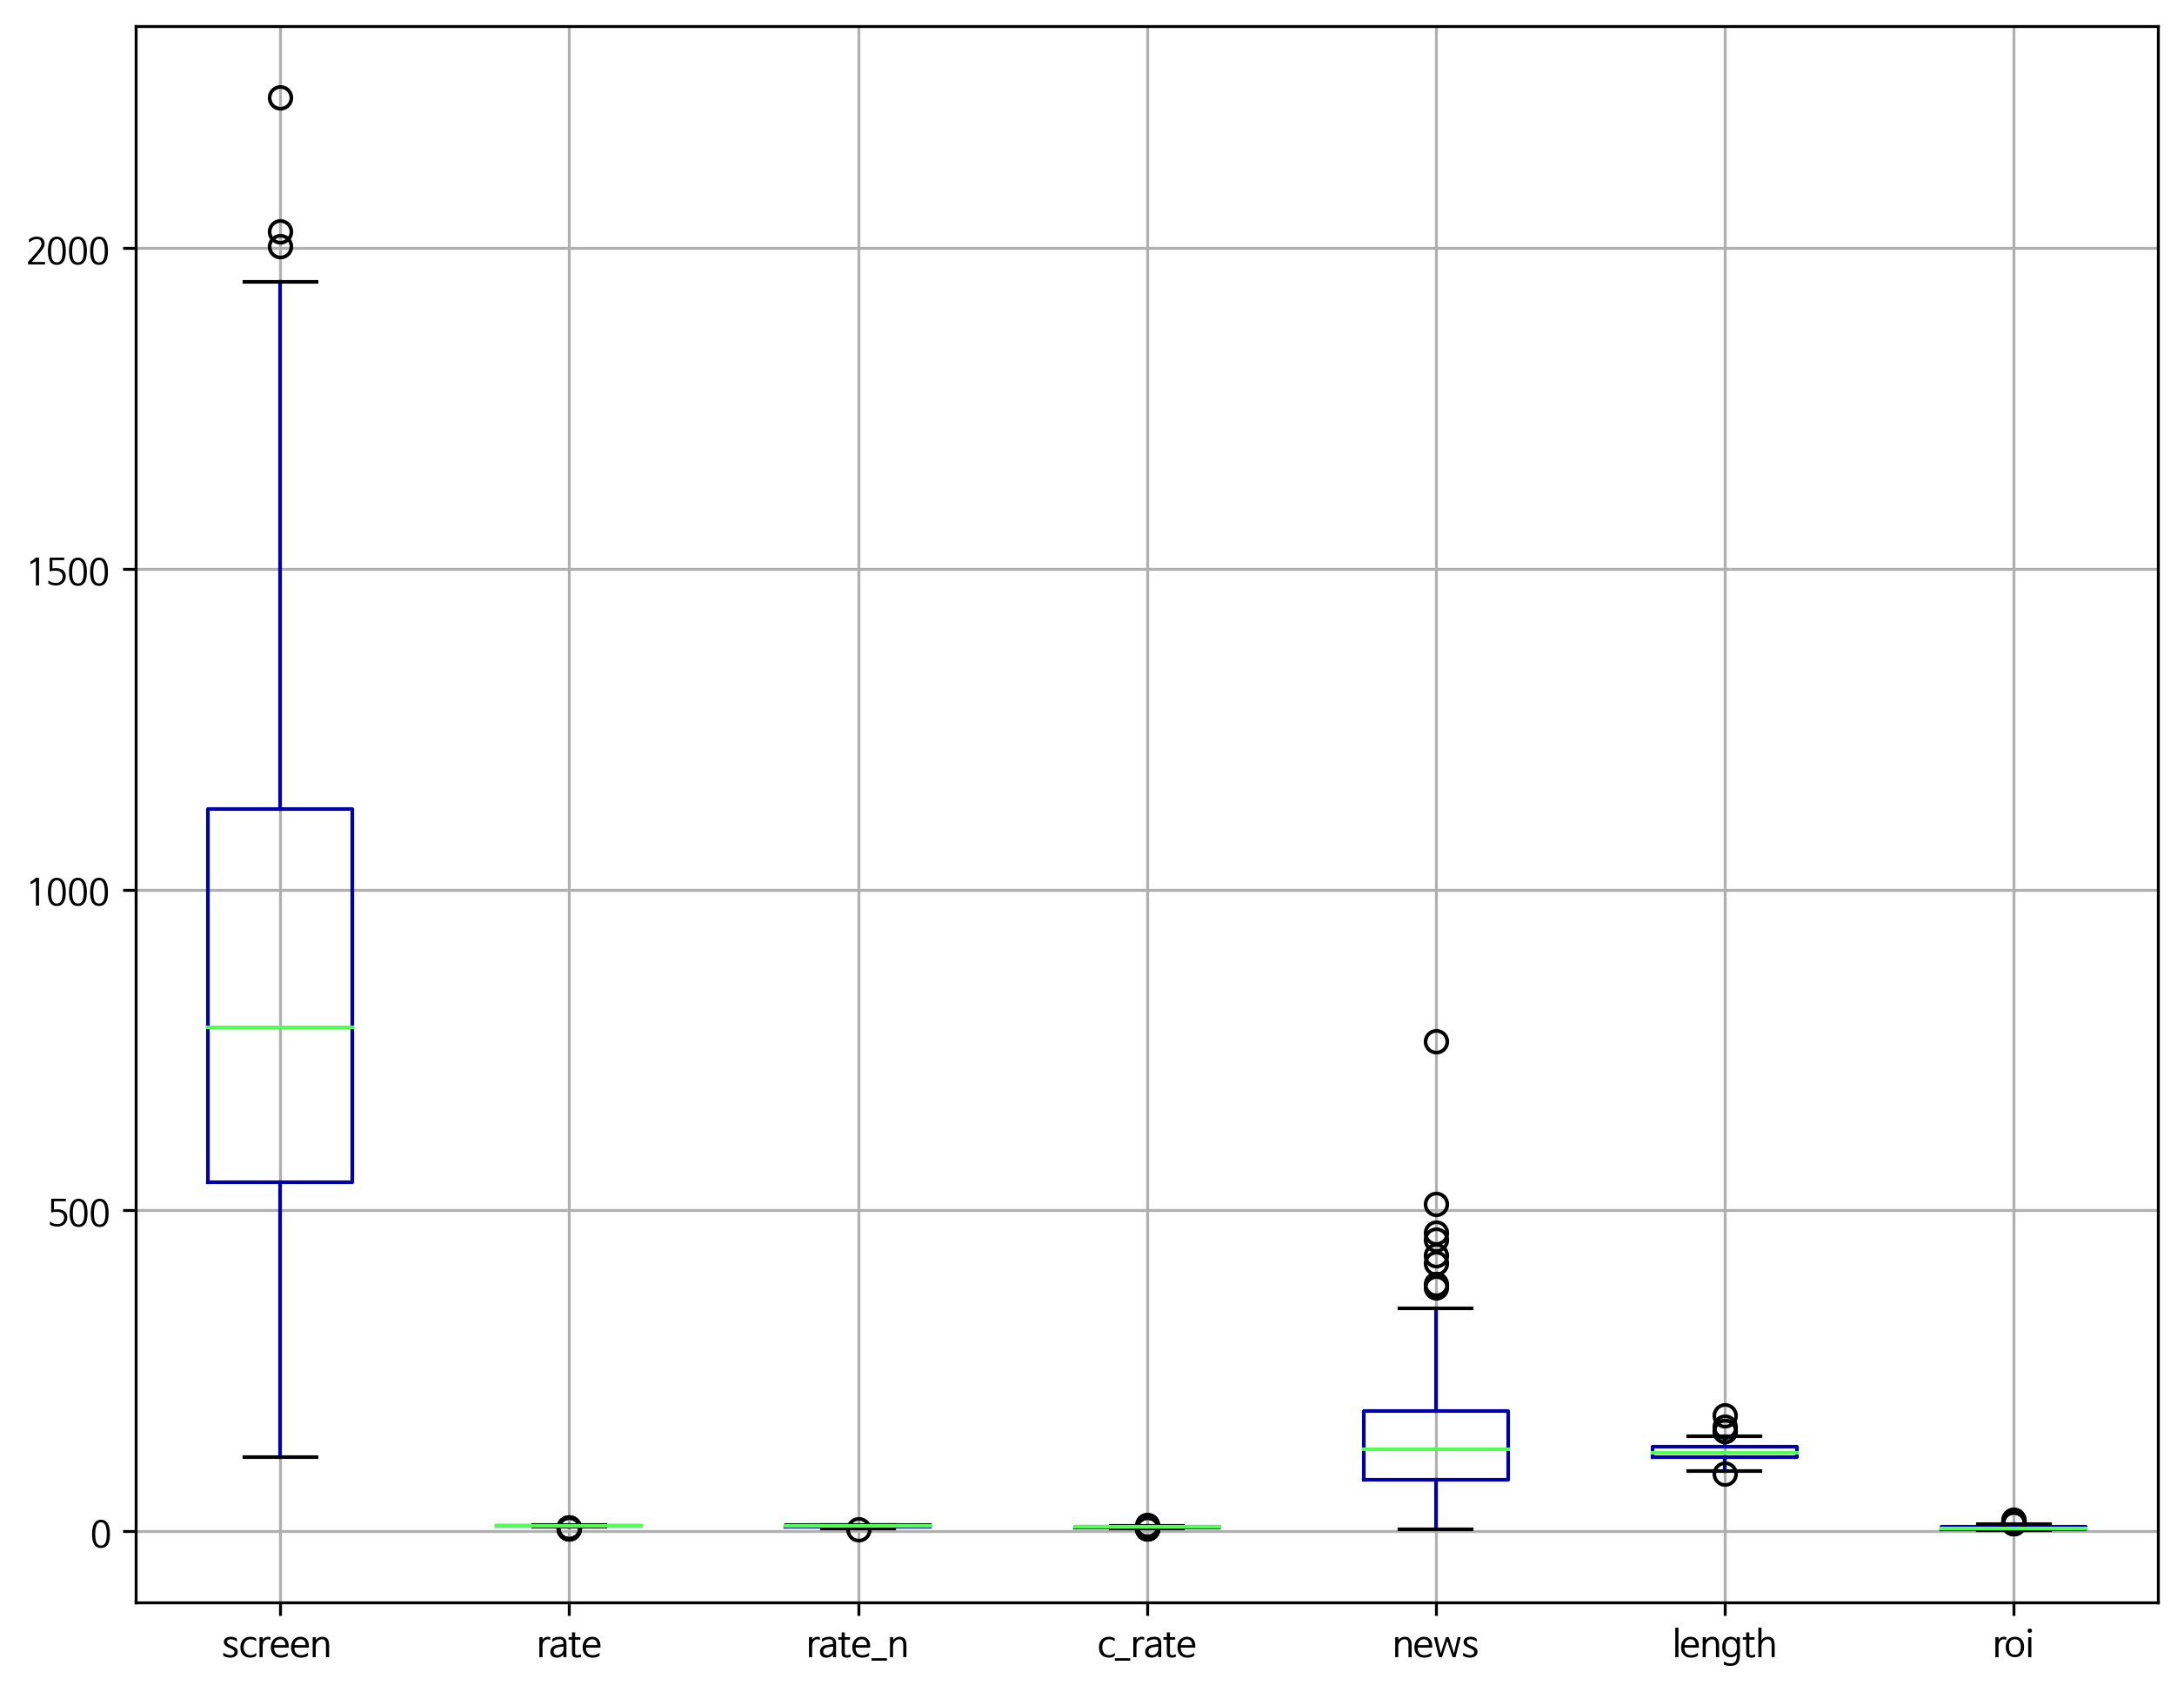

In [107]:
movie.drop(['sales', 'cost','week','box-office','times'], axis=1).boxplot(figsize = (10,8))

<AxesSubplot:>

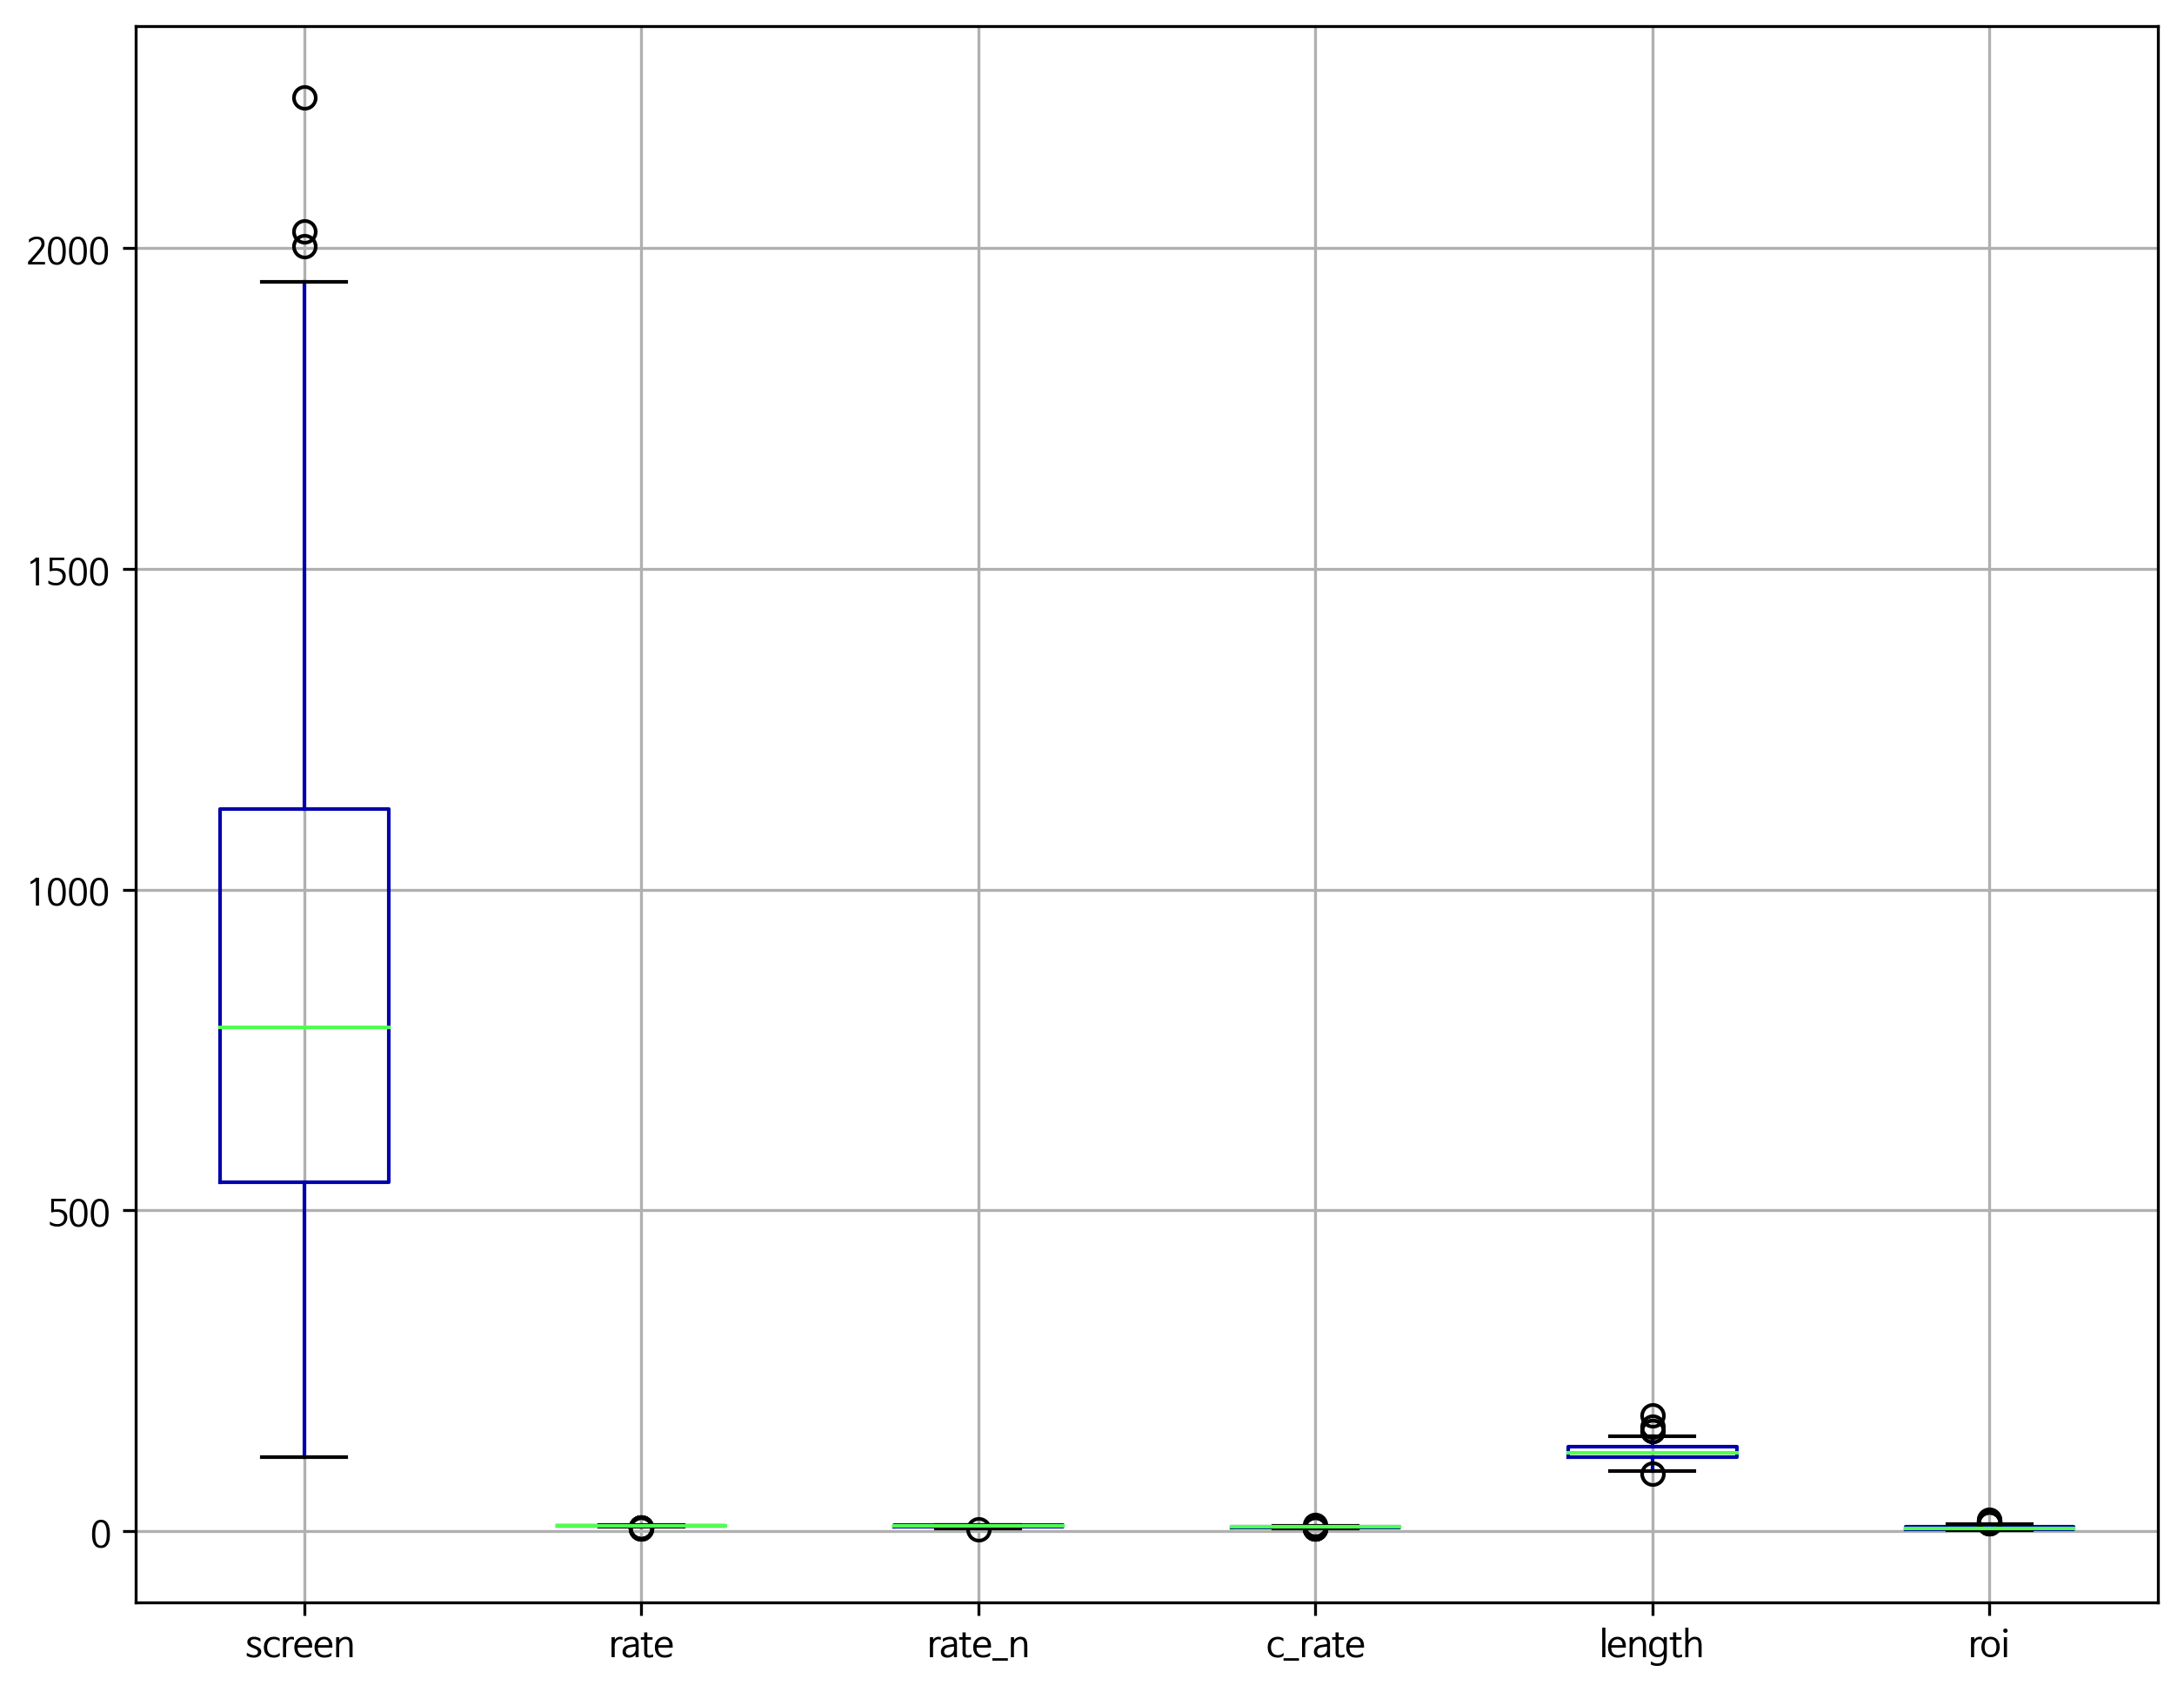

In [108]:
movie.drop(['sales', 'cost','week','box-office','times','news'], axis=1).boxplot(figsize = (10,8))

<AxesSubplot:>

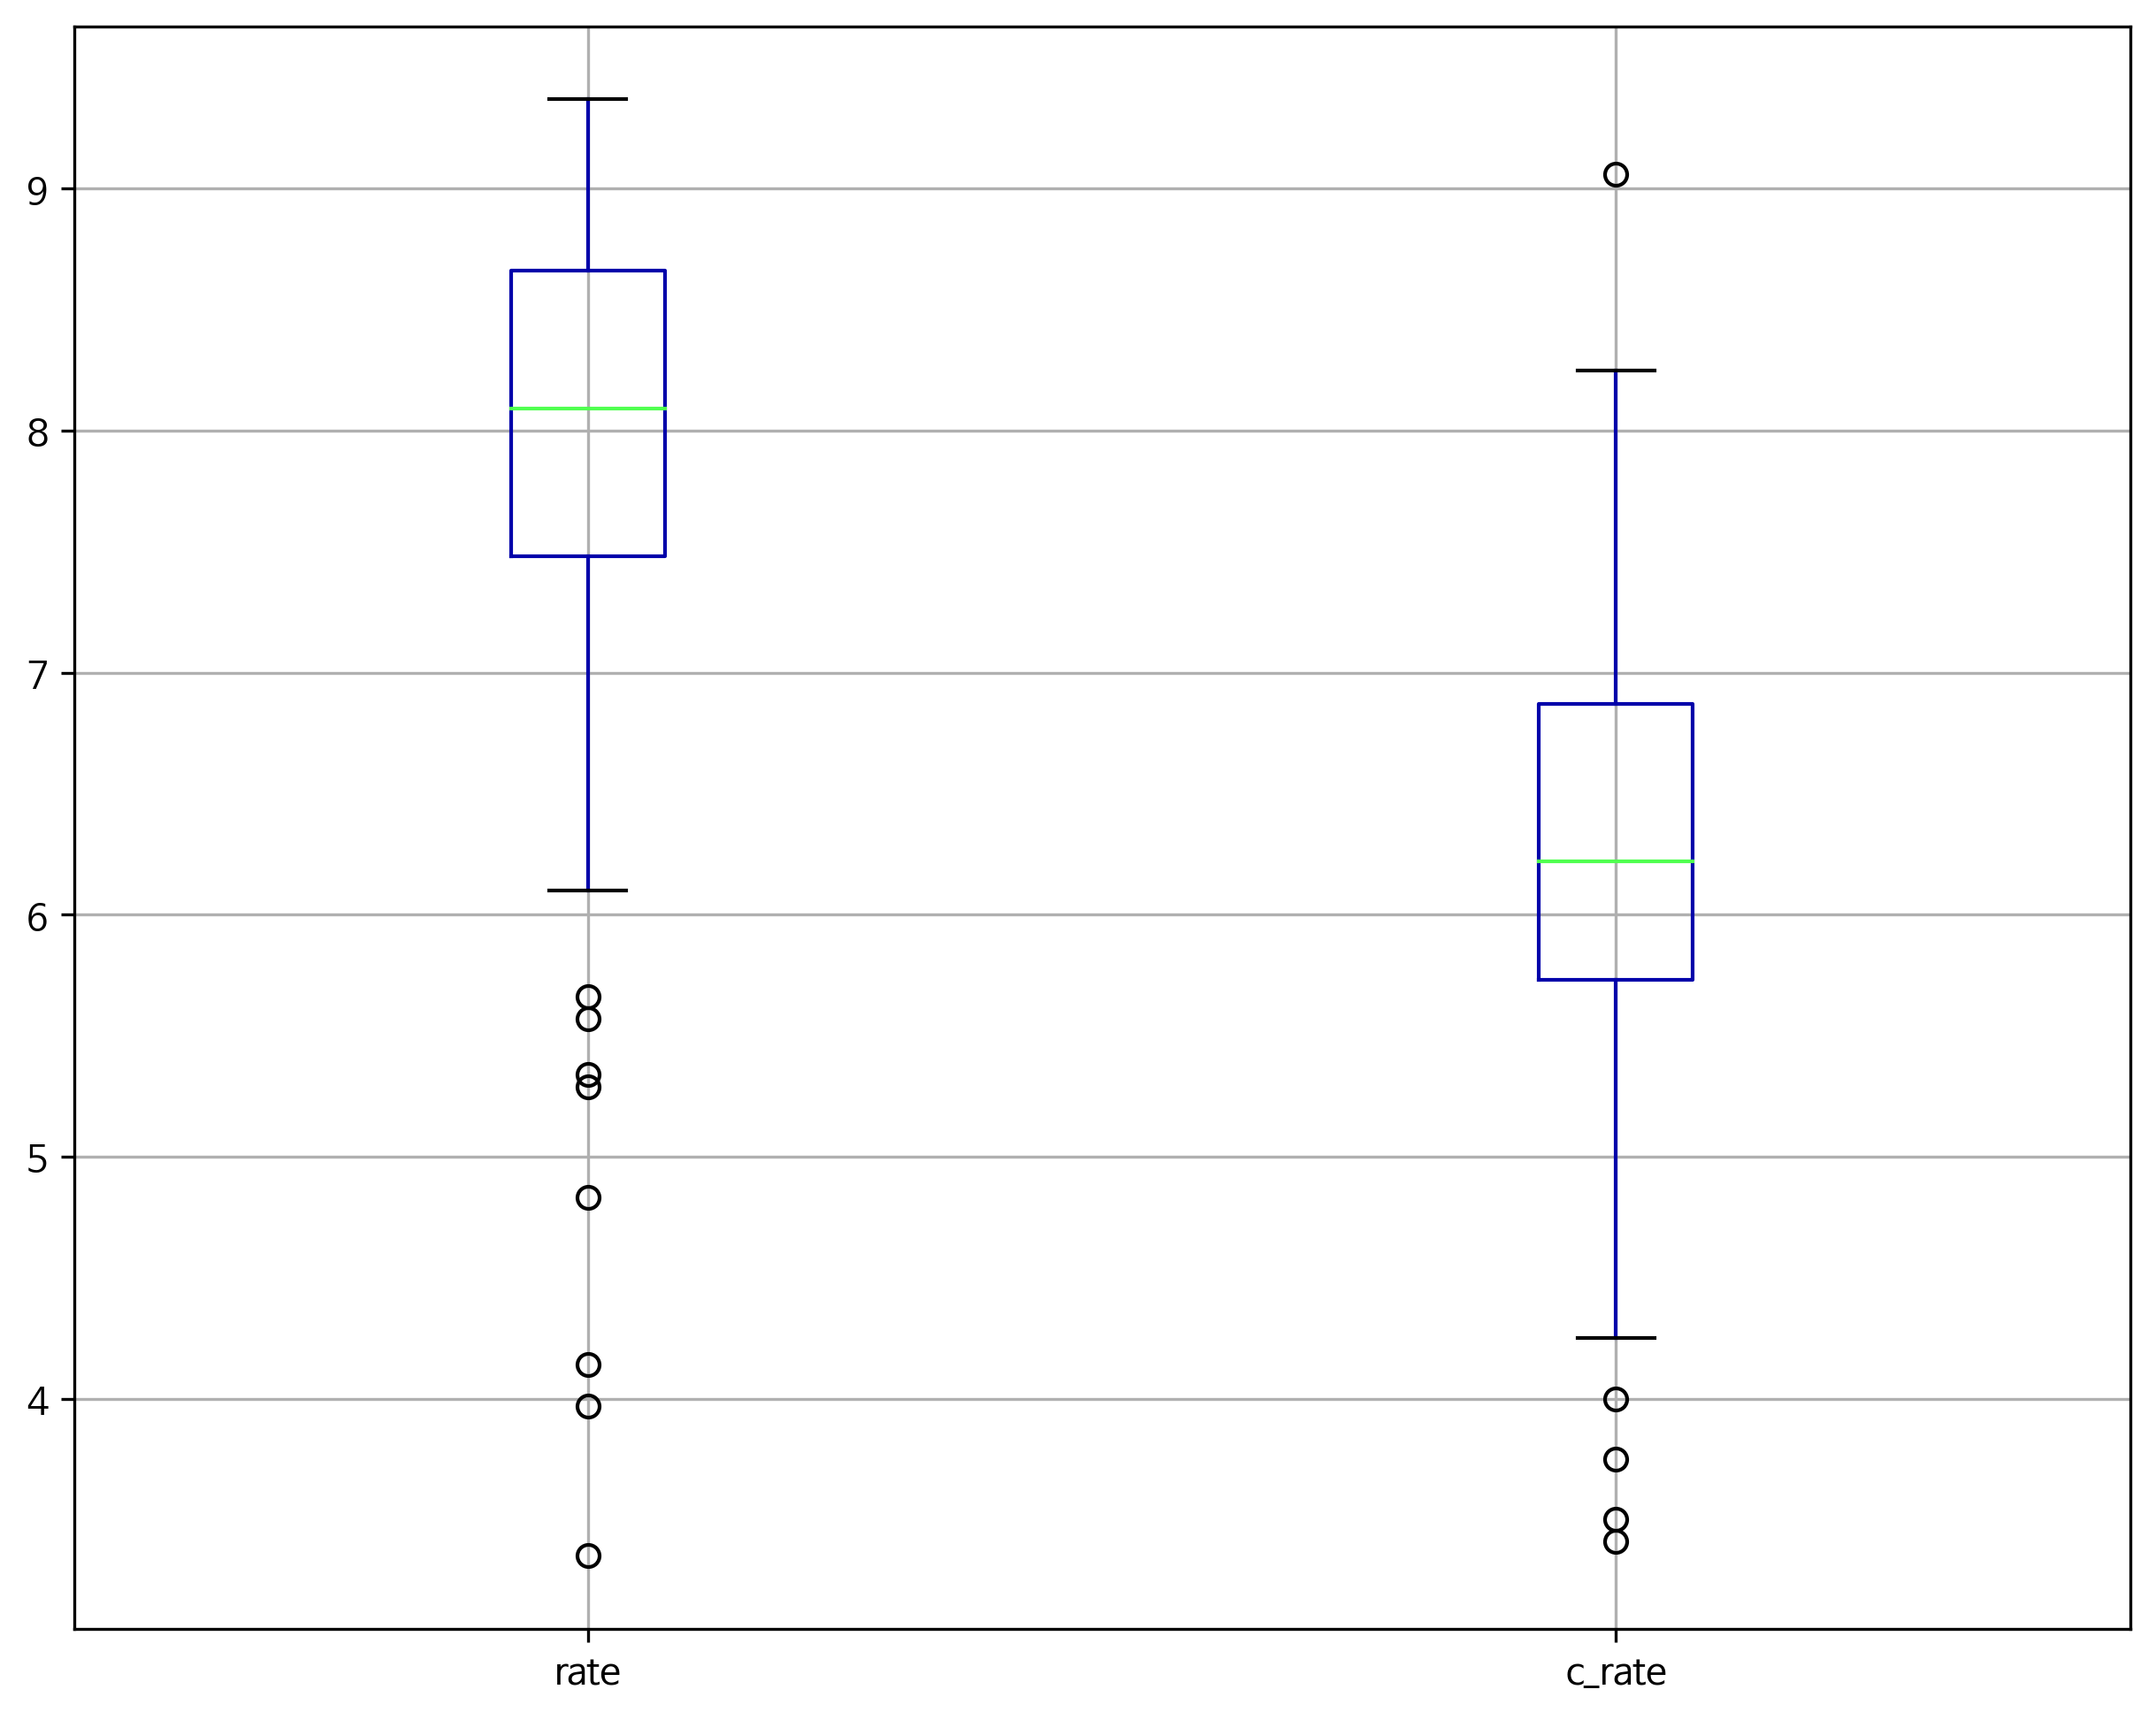

In [109]:
movie[['rate', 'c_rate']].boxplot(figsize = (10,8))

<AxesSubplot:>

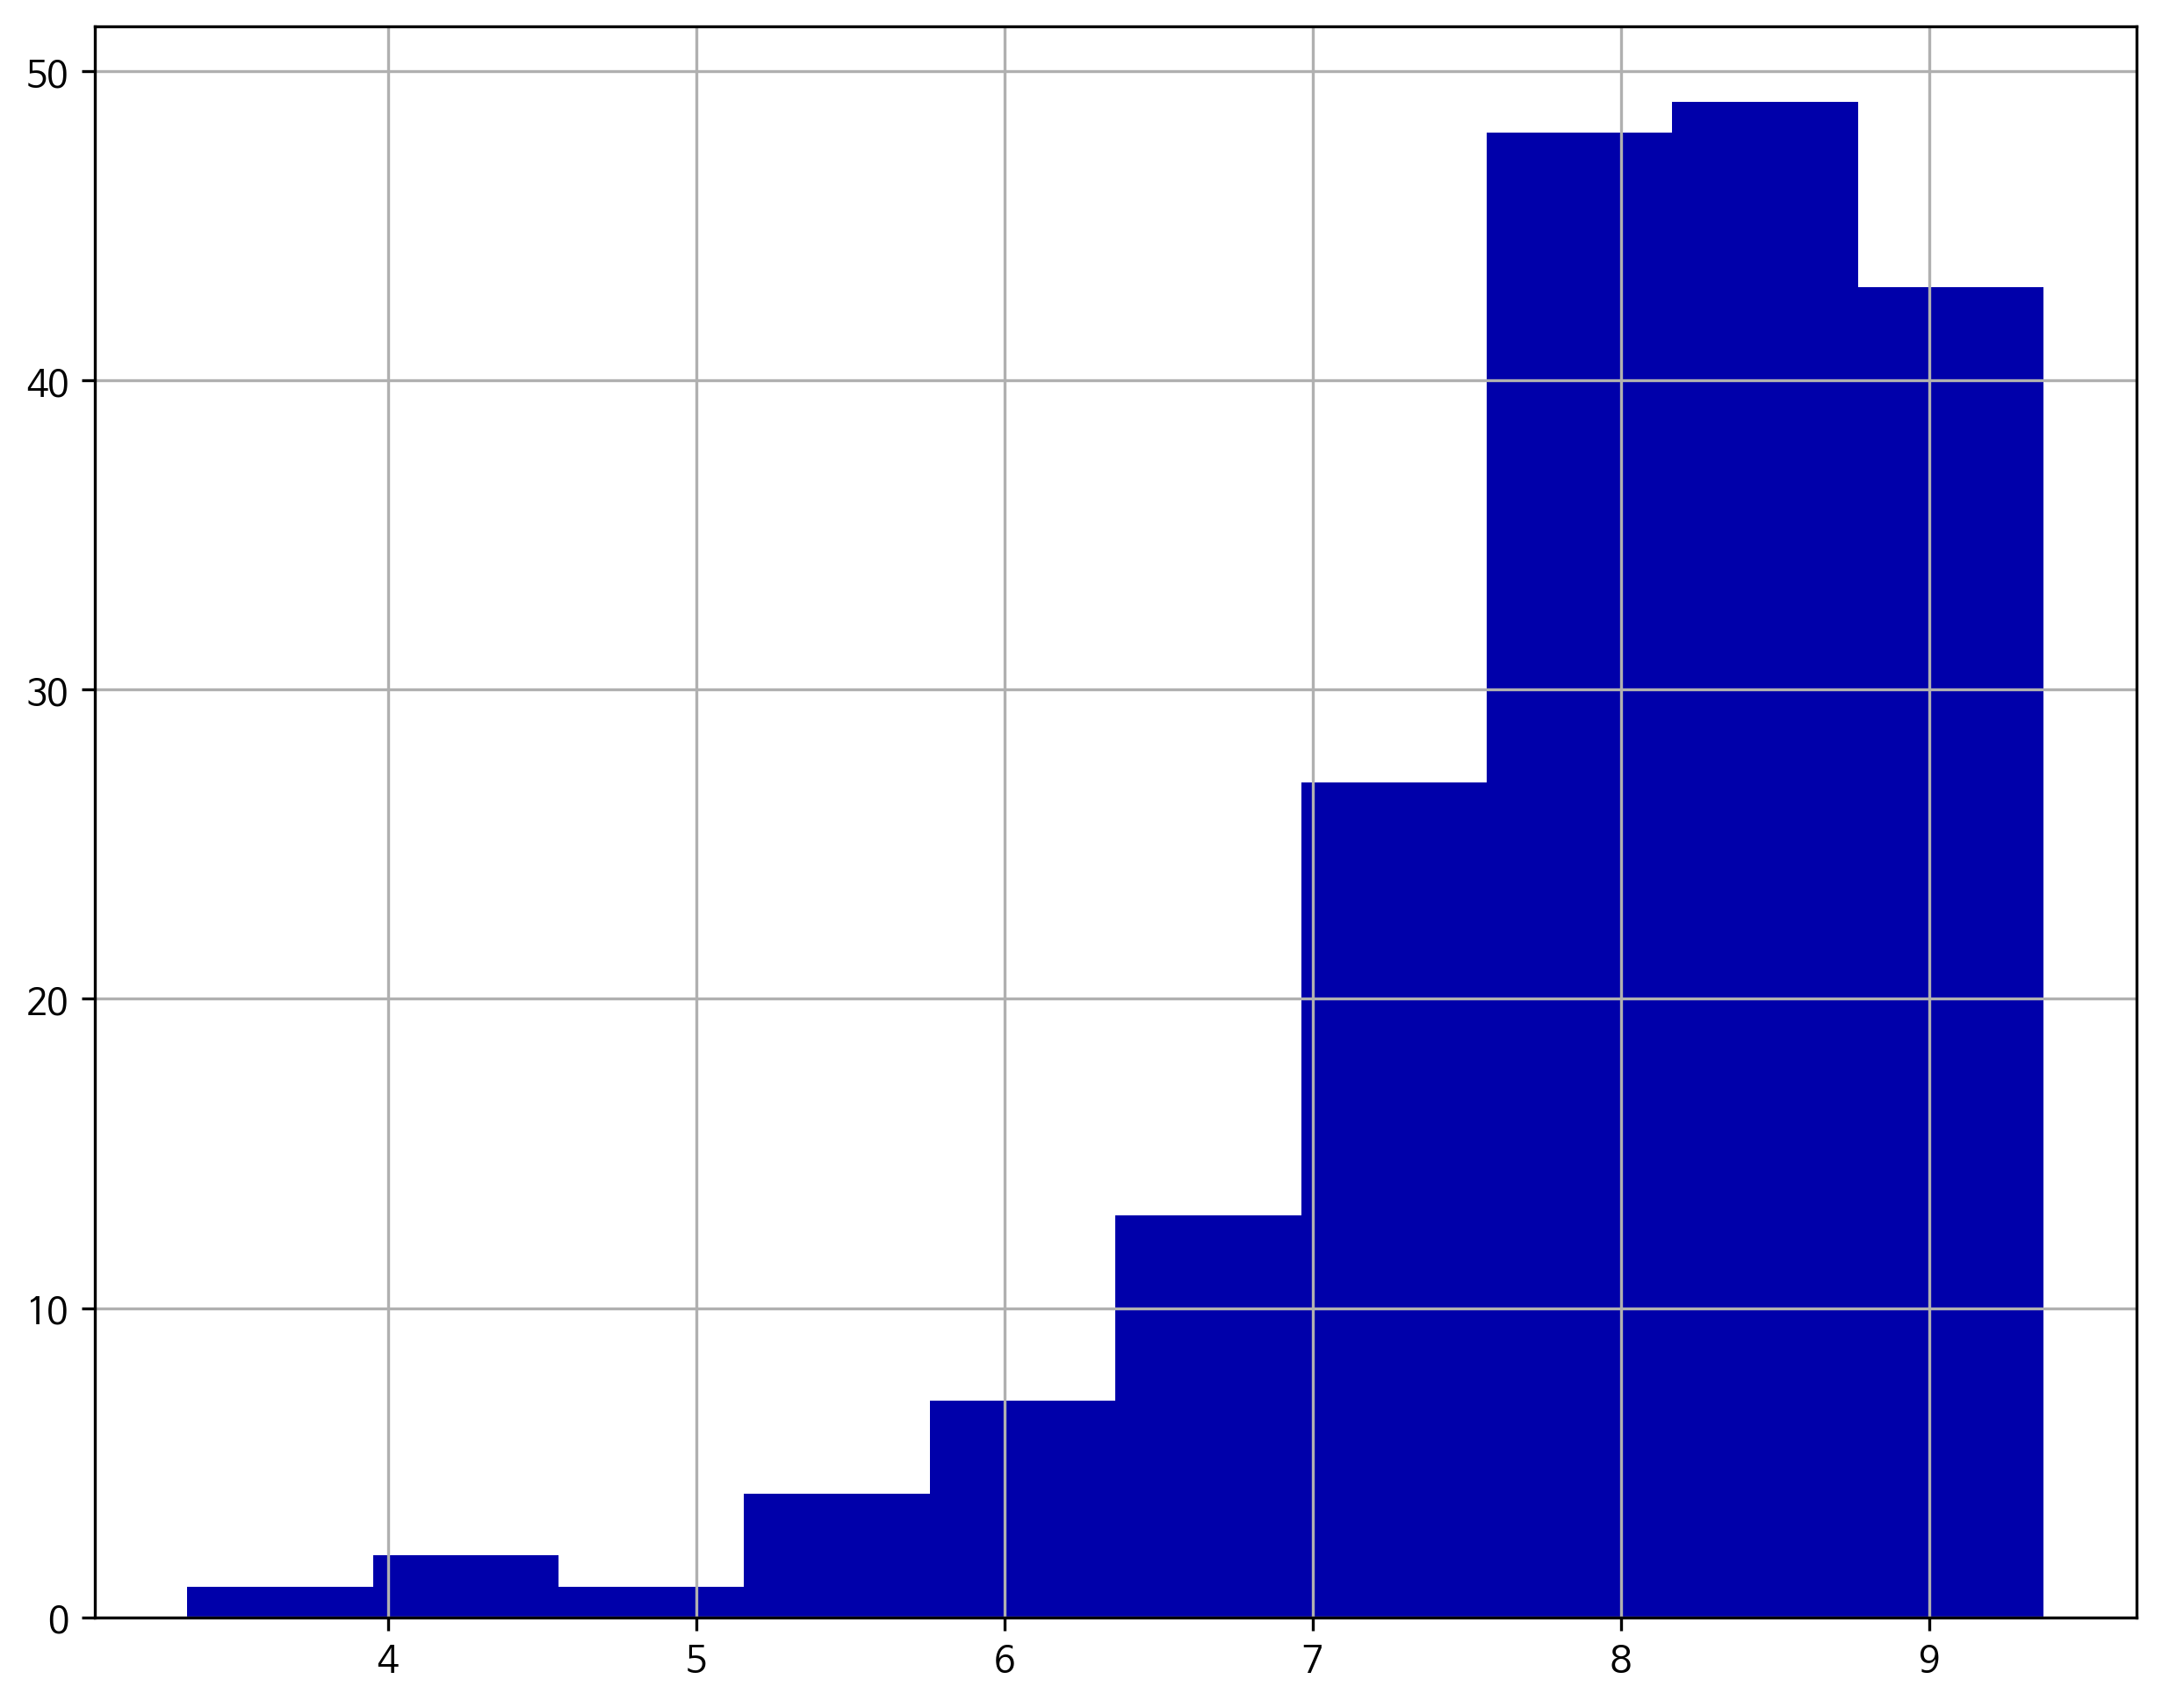

In [110]:
movie['rate'].hist(figsize = (10,8))

In [152]:
movie['rate']

0      8.45
1      8.52
2      7.83
3      9.01
4      9.01
       ... 
192    8.83
193    7.77
194    8.52
195    7.89
196    7.75
Name: rate, Length: 195, dtype: float64

<AxesSubplot:>

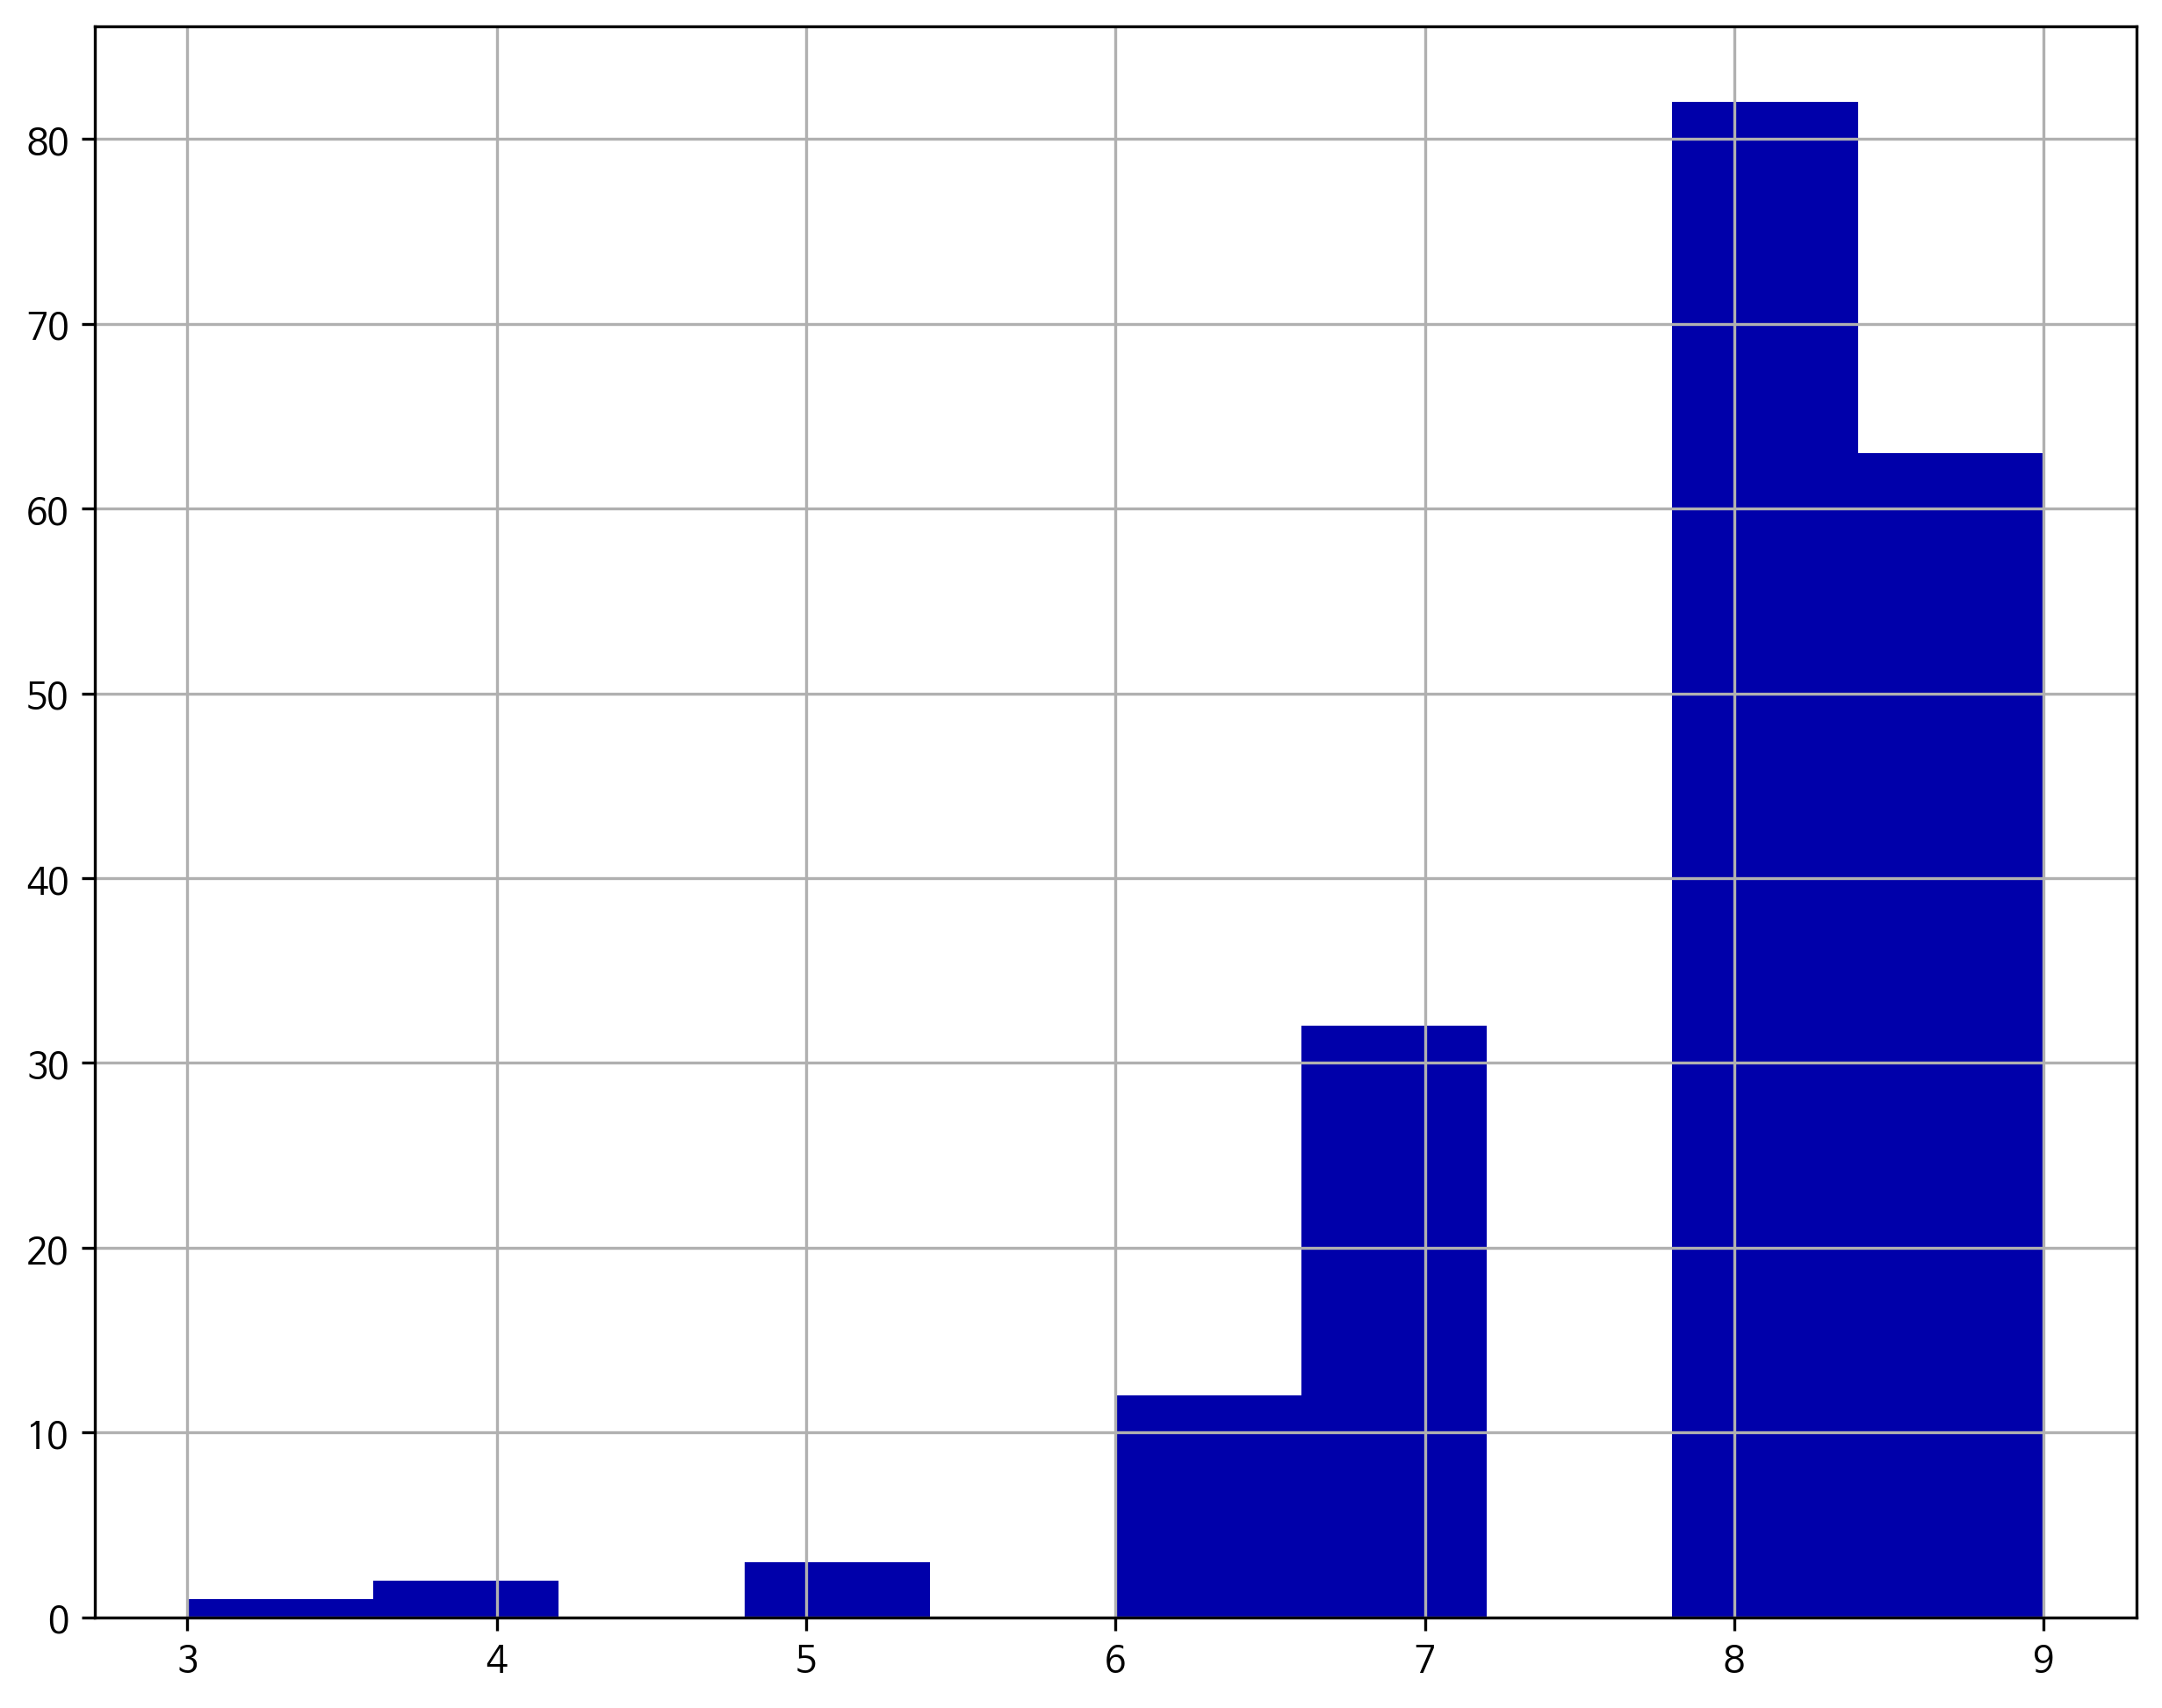

In [111]:
movie['rate_n'].hist(figsize = (10,8))

In [112]:
#필요없는 데이터를 제외
#roi가 있으므로 sales, cost 제외. 영화의 길이(length)제외, rate 제외
movies=movie.drop(['sales','cost','length','rate'], axis=1)

<AxesSubplot:>

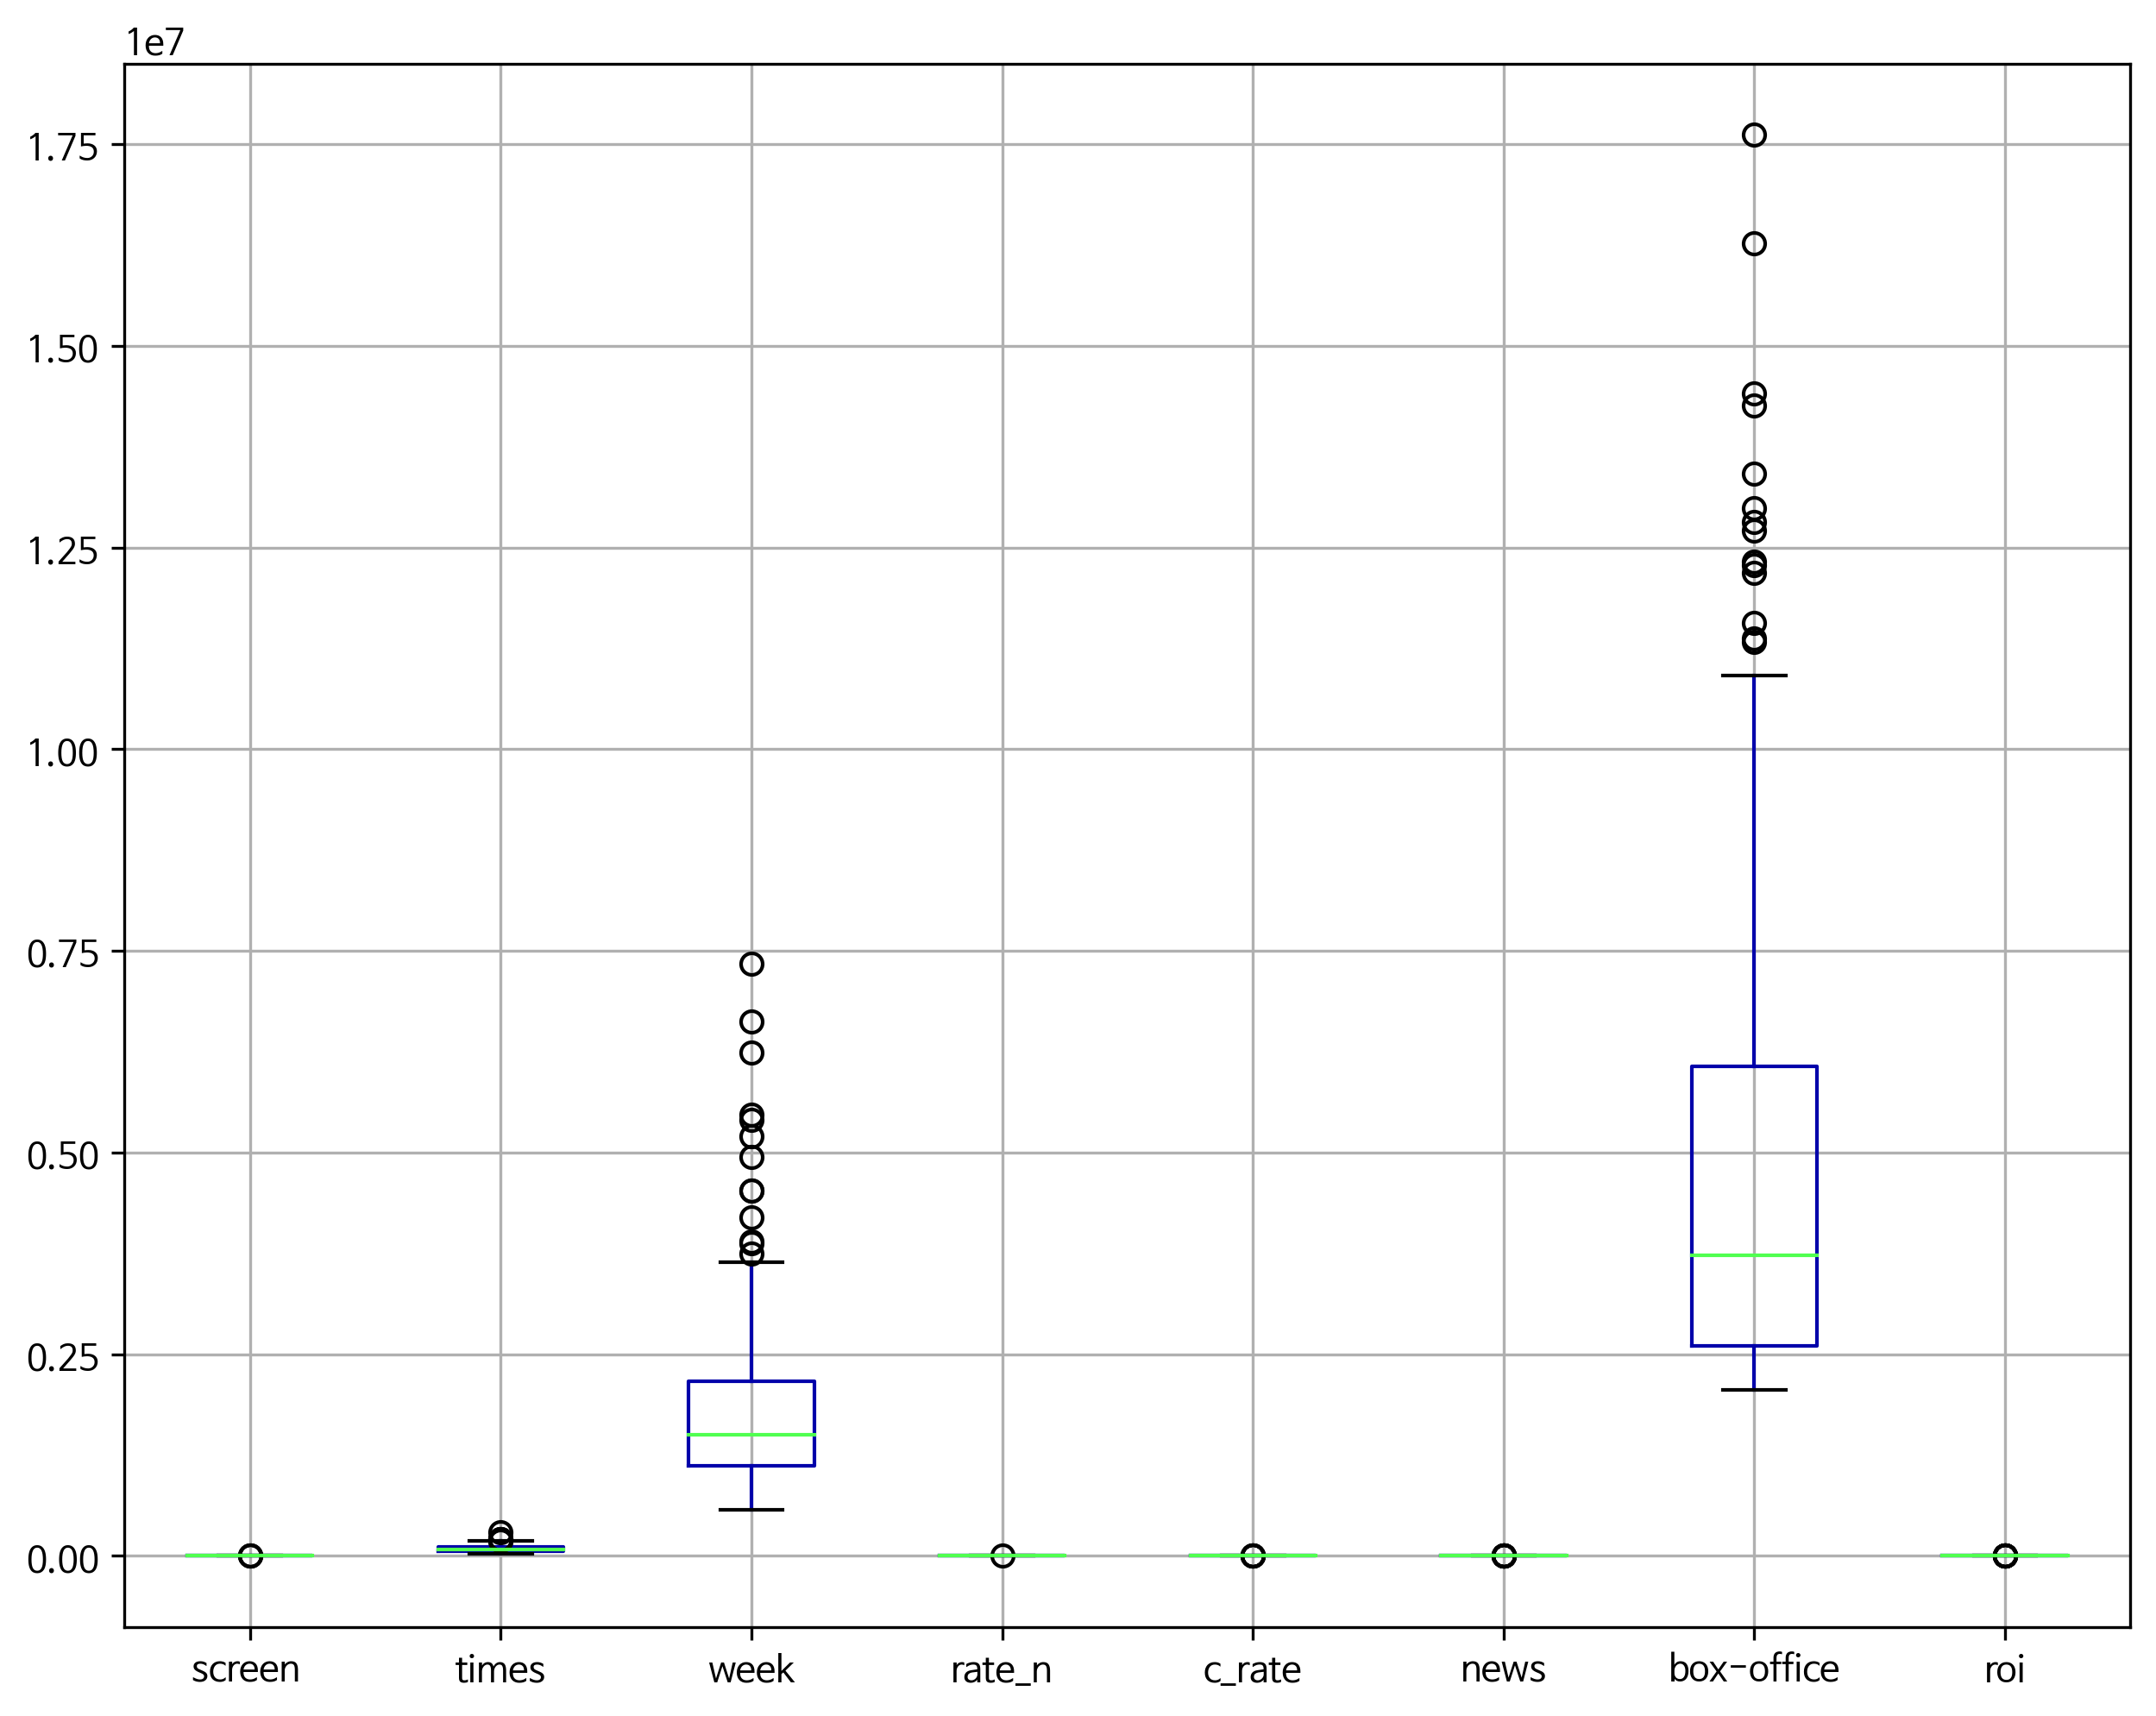

In [113]:
movies.boxplot(figsize = (10,8))

In [114]:
movies.shape

(195, 8)

In [115]:
#추적해야 할 답을 평점(rate)로 정함.
movies['rate_n'].unique()

array([8, 9, 7, 5, 6, 4, 3], dtype=int64)

In [116]:
movies['rate_n'].value_counts()

8    82
9    63
7    32
6    12
5     3
4     2
3     1
Name: rate_n, dtype: int64

In [119]:
# 품질이 좋고 나쁜 것을 나누는 기준 설정
# 6.5를 기준으로 bad(0) good(1)으로 나눈다
bins = (2.9, 6.5, 9.1)
group_names = [0, 1]
movies['rate_cla'] = pd.cut(movies['rate_n'], bins = bins, labels = group_names)

In [120]:
movies.shape

(195, 9)

In [121]:
movies.head(5)

,screen,times,week,rate_n,...,news,box-office,roi,rate_cla
0,1587,188668,6626792,8,...,454.0,17615437,7.14,1
1,2003,292576,3894937,9,...,174.0,16264944,14.69,1
2,1912,213262,5201580,8,...,244.0,14411502,2.89,1
3,1044,212683,1977222,9,...,72.0,14263203,6.16,1
4,1115,199240,3590029,9,...,226.0,13414200,11.68,1


<AxesSubplot:>

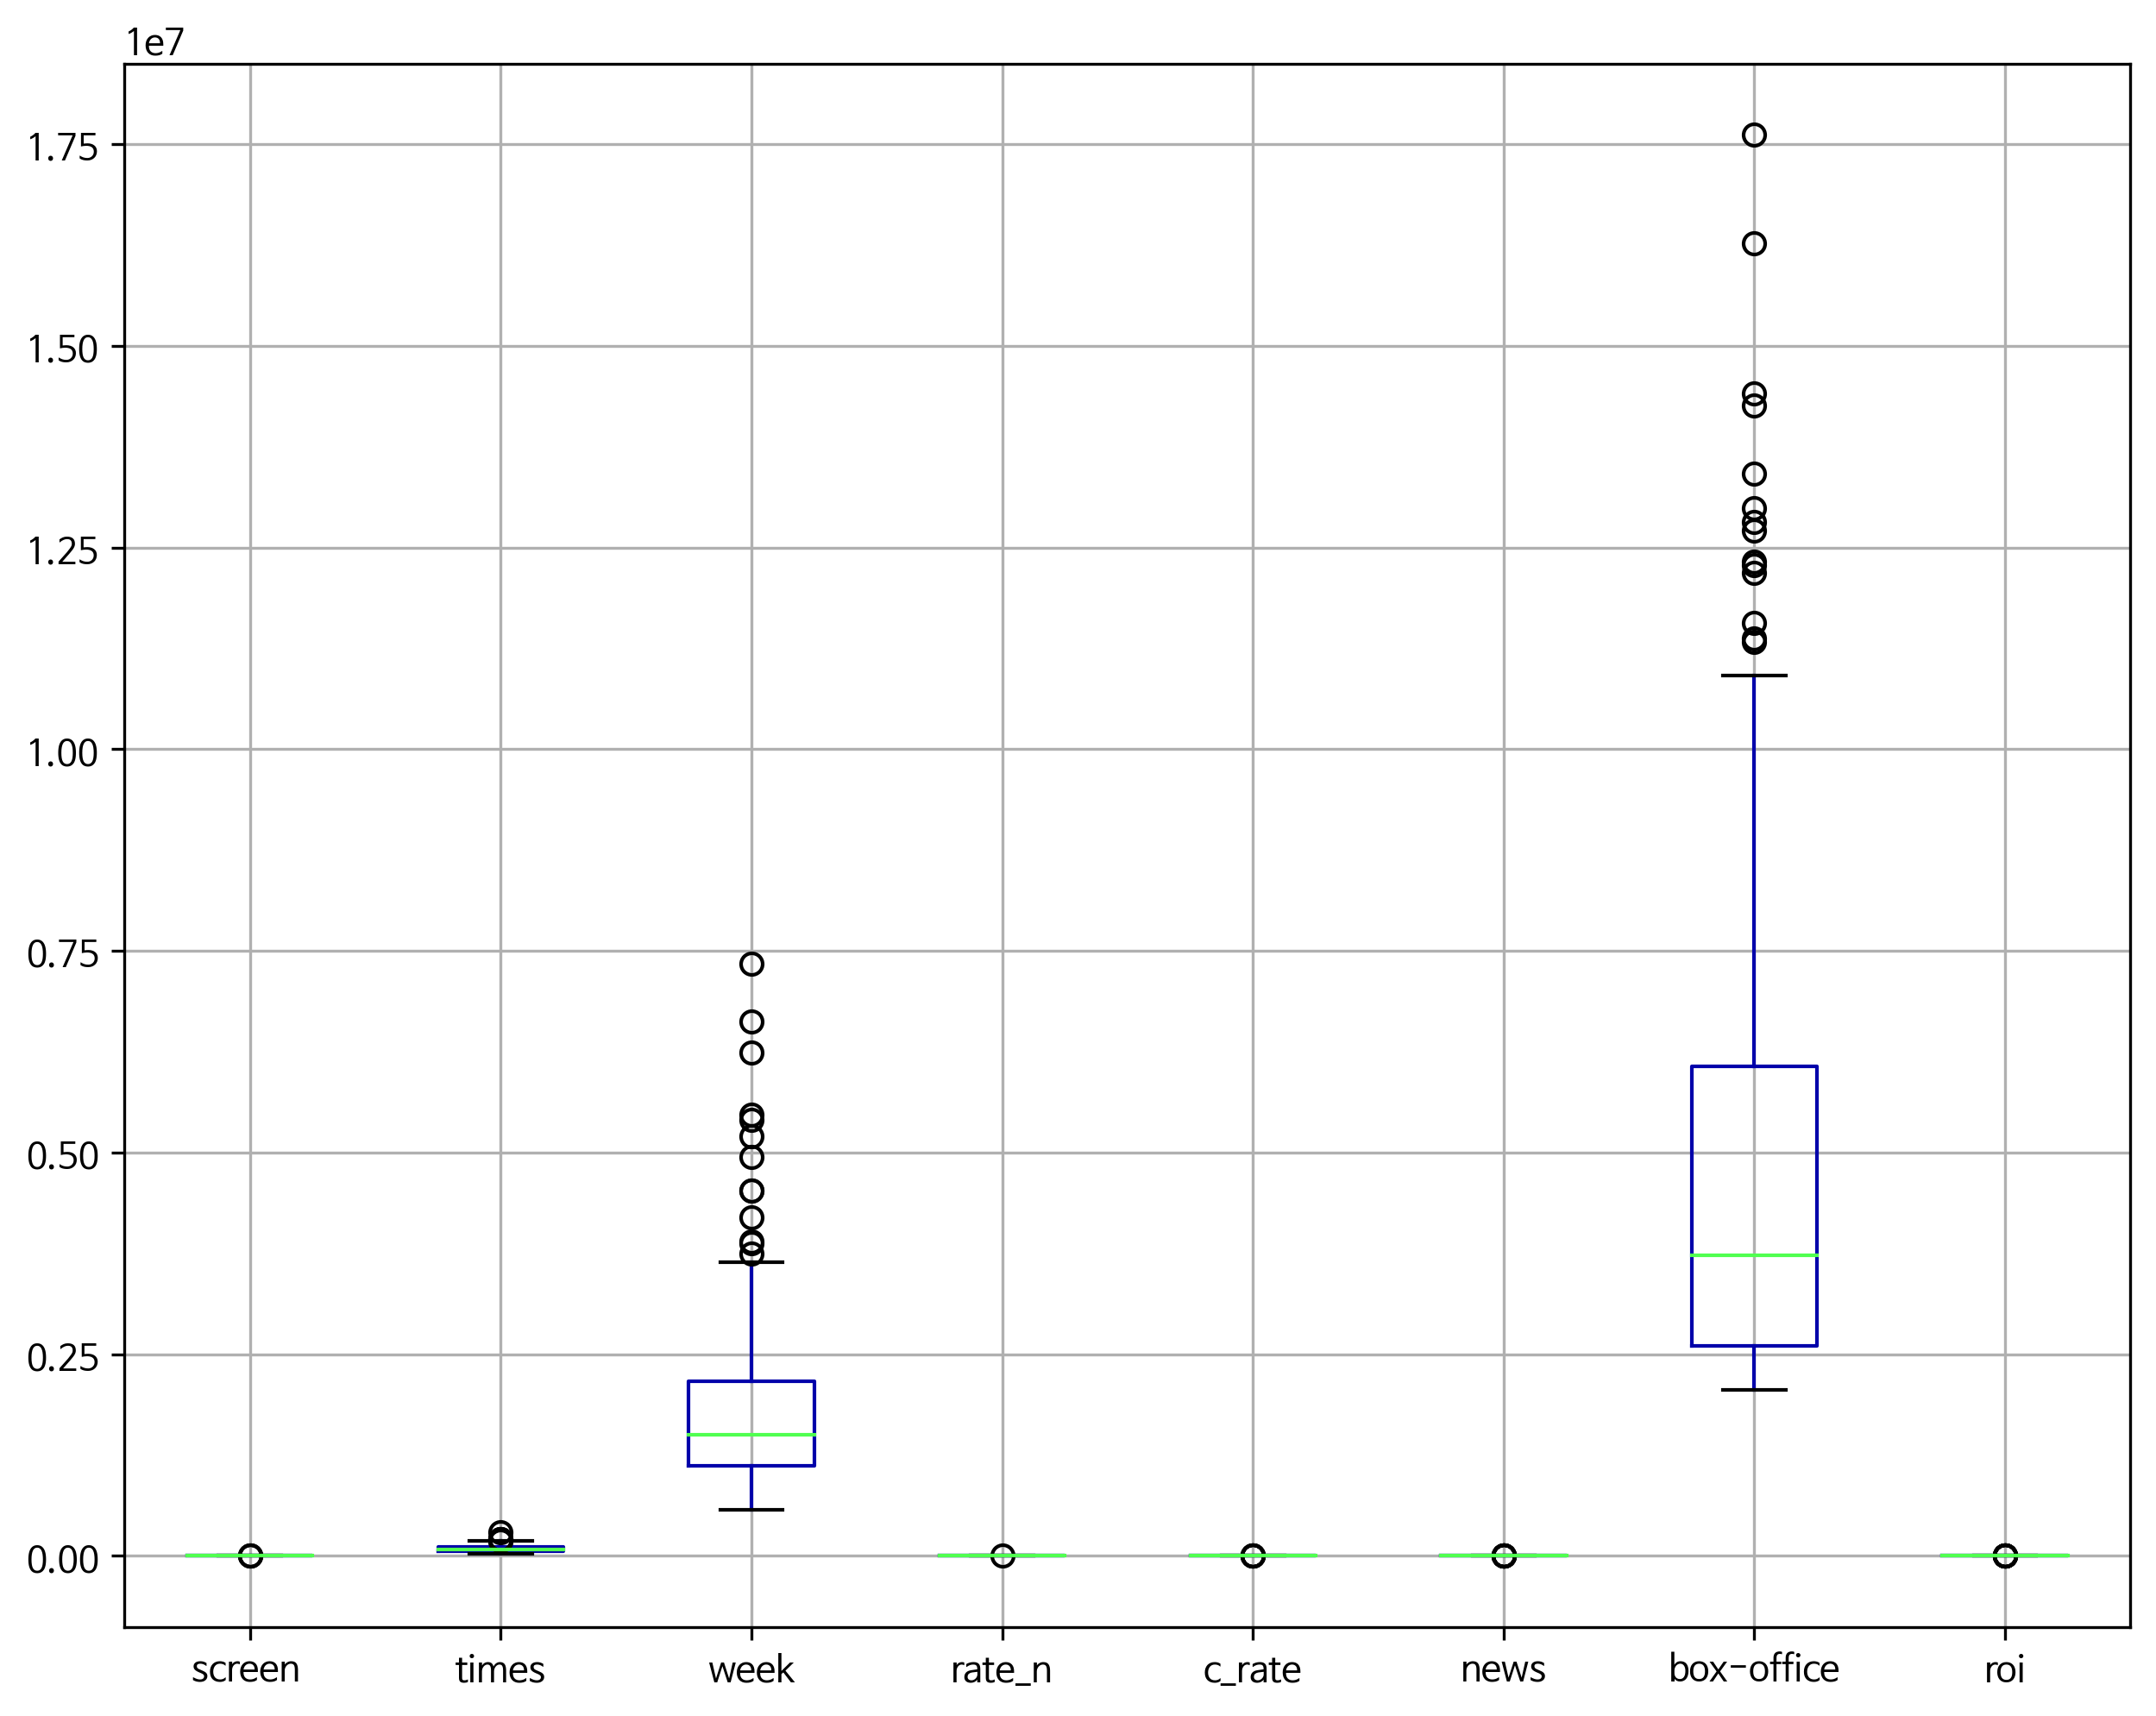

In [147]:
movies.boxplot(figsize = (10,8))

In [122]:
movies['rate_cla'].value_counts()

1    177
0     18
Name: rate_cla, dtype: int64

In [123]:
#예측 변수와 레이블을 나눔
X_new = movies.drop(['rate_n', 'rate_cla'], axis = 1)
y_ = movies['rate_n'] # regression 용
y = movies['rate_cla'] 

In [124]:
X_new.head(5)

,screen,times,week,c_rate,news,box-office,roi
0,1587,188668,6626792,6.29,454.0,17615437,7.14
1,2003,292576,3894937,6.80,174.0,16264944,14.69
2,1912,213262,5201580,5.92,244.0,14411502,2.89
3,1044,212683,1977222,5.81,72.0,14263203,6.16
4,1115,199240,3590029,7.50,226.0,13414200,11.68


In [125]:
y.value_counts()

1    177
0     18
Name: rate_cla, dtype: int64

In [126]:
y_.value_counts()

8    82
9    63
7    32
6    12
5     3
4     2
3     1
Name: rate_n, dtype: int64

In [127]:
#모듈 불러오기
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 

In [128]:
#데이터 전처리
sc = StandardScaler()
X = sc.fit_transform(X_new)

In [129]:
X[:5]

array([[ 1.757,  2.306,  4.197,  0.07 ,  2.927,  4.109,  0.793],
       [ 2.761,  4.781,  1.799,  0.616,  0.246,  3.674,  3.338],
       [ 2.542,  2.892,  2.946, -0.326,  0.916,  3.077, -0.64 ],
       [ 0.446,  2.878,  0.116, -0.444, -0.73 ,  3.03 ,  0.462],
       [ 0.618,  2.558,  1.531,  1.365,  0.744,  2.756,  2.324]])

<AxesSubplot:>

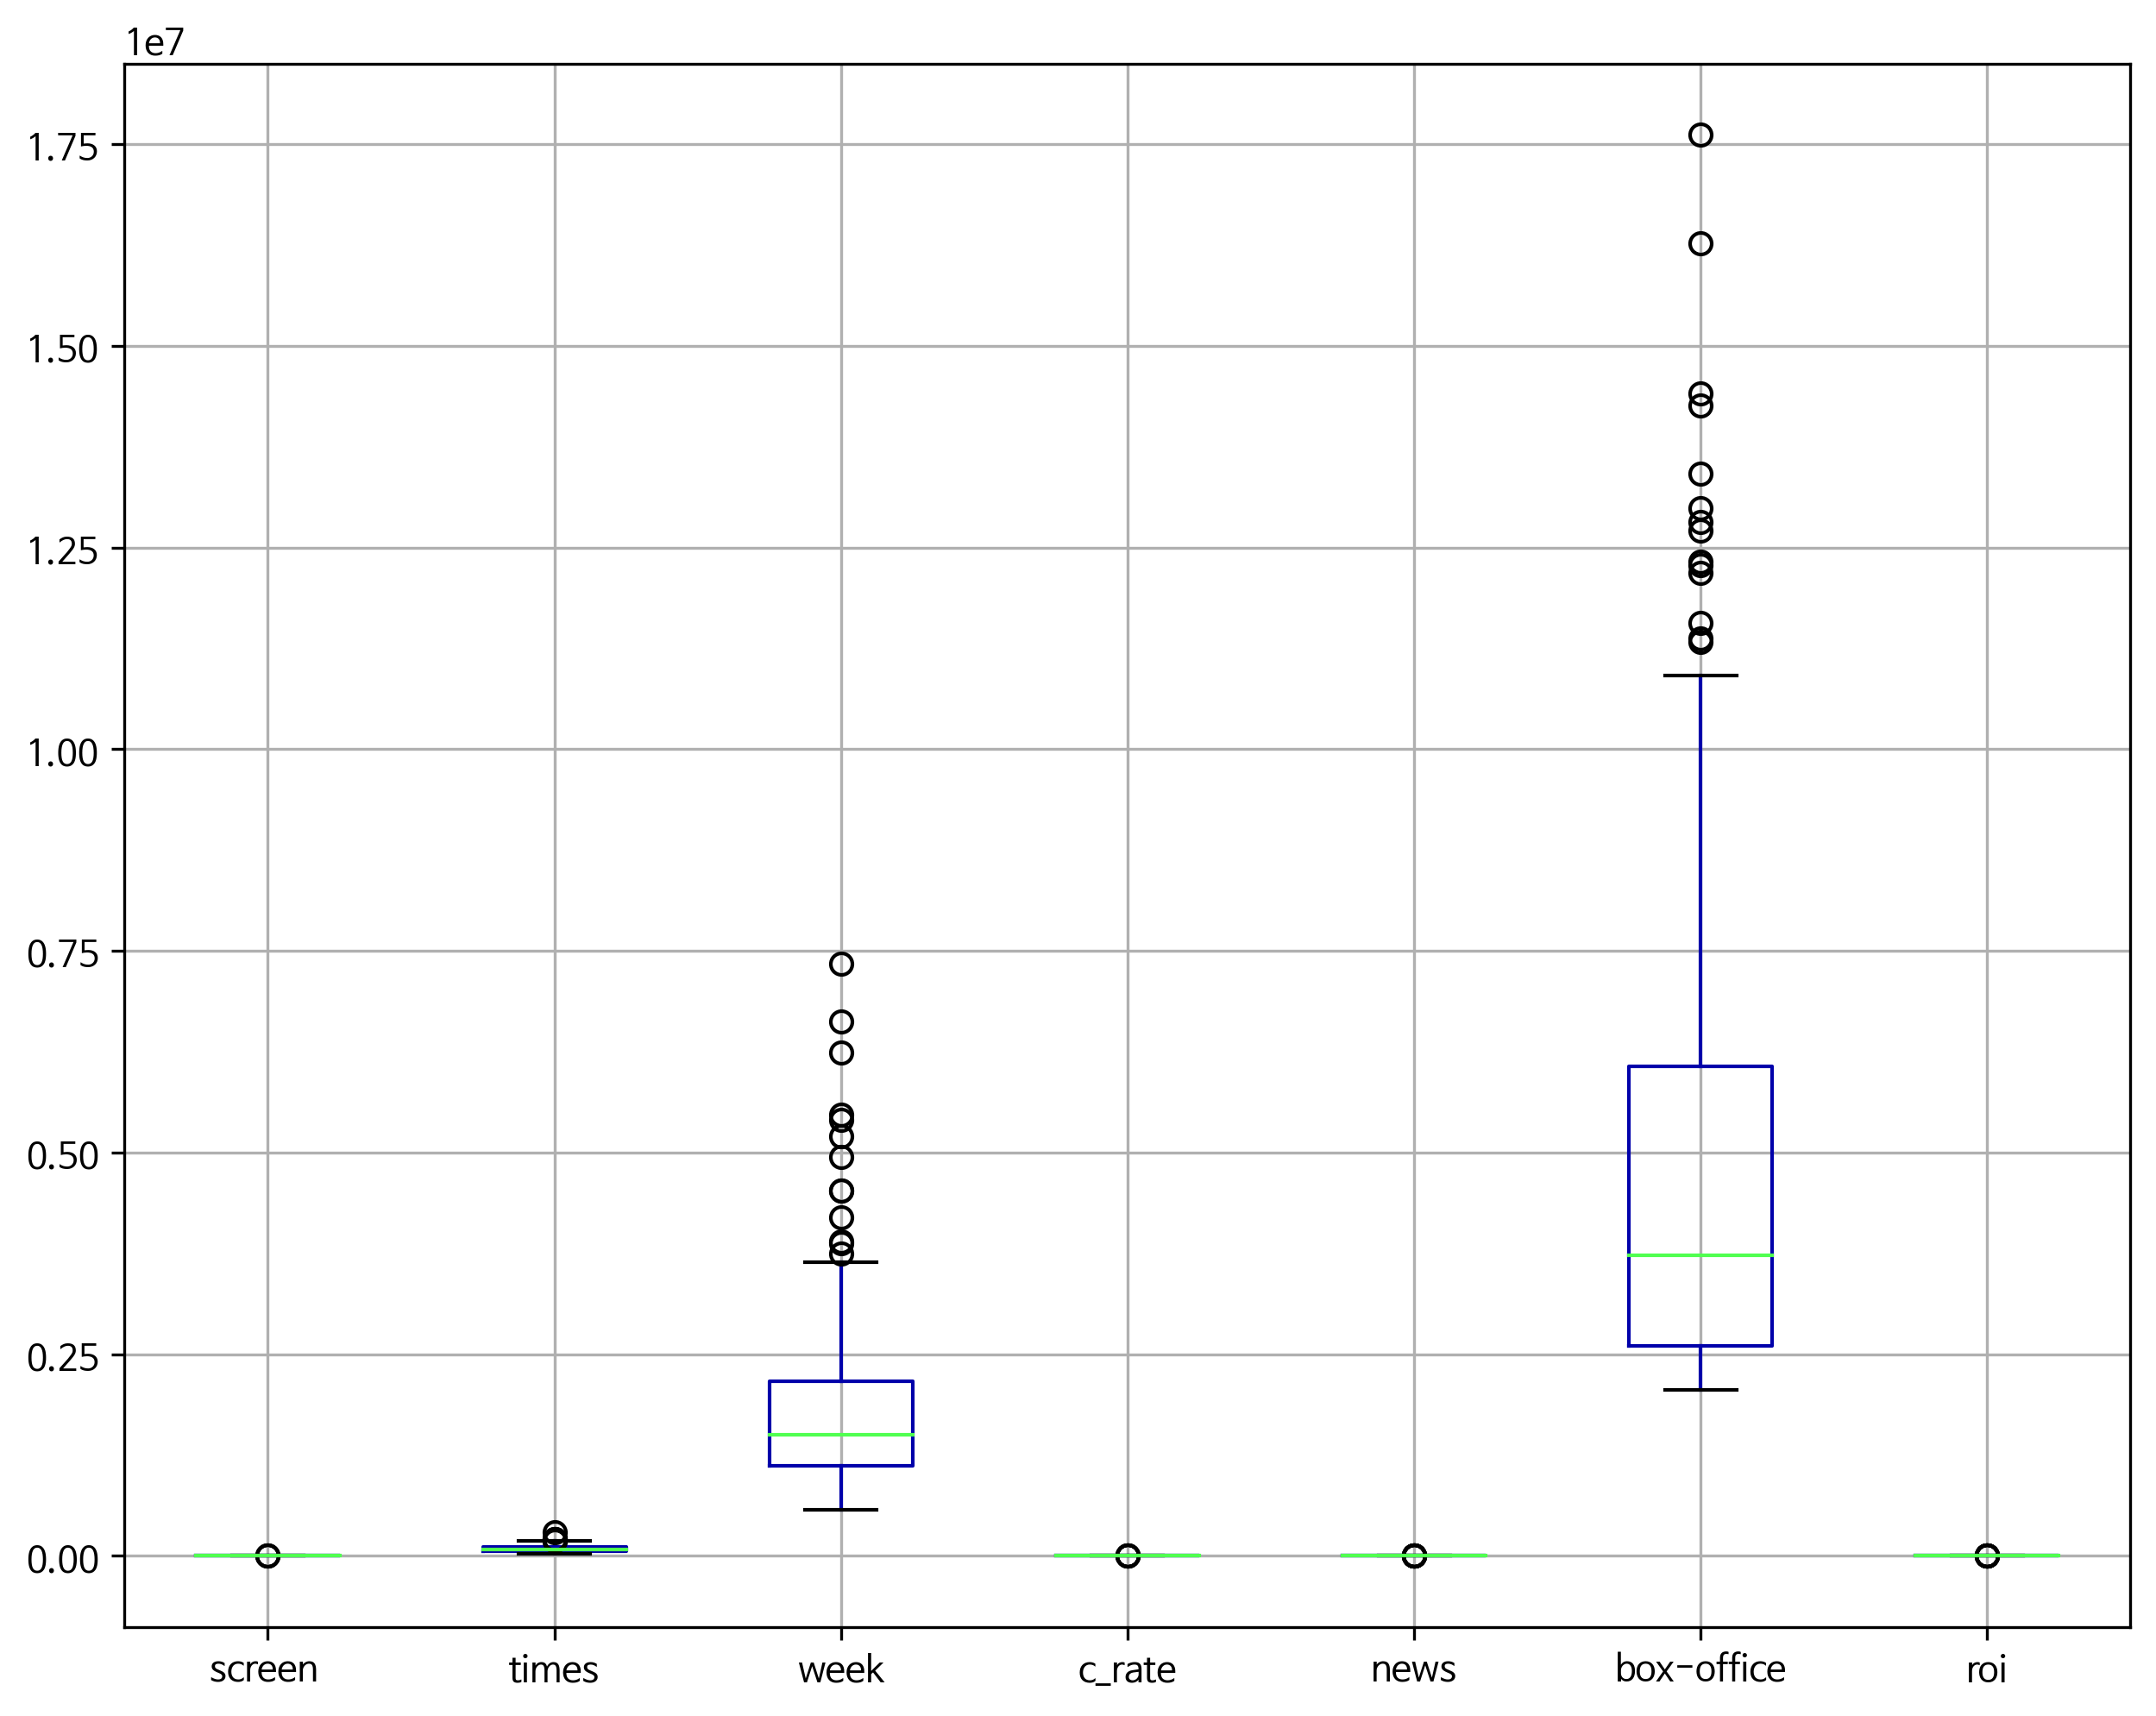

In [150]:
X_new.boxplot(figsize = (10,8))

In [130]:
# 훈련과 테스트 데이터 나누기
# 분류와 회귀를 따로
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7) # 분류용
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y_, test_size = 0.3, random_state = 7) # 회귀용

In [131]:
X_train.shape, y_train.shape

((136, 7), (136,))

In [132]:
X_test.shape, y_test.shape

((59, 7), (59,))

In [164]:
#KNN 분류기를 통한 테스트 1
clf = KNeighborsClassifier(n_neighbors=1)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.864406779661017

In [165]:
#KNN 분류기를 통한 테스트 2
clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9152542372881356

In [166]:
#KNN 분류기를 통한 테스트 3
clf = KNeighborsClassifier(n_neighbors=10)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9152542372881356

In [167]:
#KNN 분류기를 통한 테스트 34
clf = KNeighborsClassifier(n_neighbors=15)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9322033898305084

In [168]:
#결정트리 1
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.847457627118644

In [169]:
#결정트리 2
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.8135593220338984

In [171]:
#결정트리 3
clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.8305084745762712

In [172]:
#랜덤 포레스트 1
rfc = RandomForestClassifier(max_depth=3, n_estimators=300) 
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.9322033898305084

In [173]:
#랜덤 포레스트 2
rfc = RandomForestClassifier(max_depth=5, n_estimators=300) 
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.9322033898305084

In [174]:
#랜덤 포레스트 3
rfc = RandomForestClassifier(max_depth=7, n_estimators=300) 
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.9322033898305084

In [144]:
#그라디언트 부스팅
GBC = GradientBoostingClassifier(max_depth=5, n_estimators=100, learning_rate=0.1, random_state=42)
GBC.fit(X_train, y_train)
GBC.score(X_test,y_test)

0.8983050847457628

In [145]:
#혼돈 매스틱스로 평가
pred_rfc = rfc.predict(X_test)
confusion_matrix(y_test, pred_rfc)
# RandomForest에 대한 confusion_matrix

array([[ 1,  3],
       [ 1, 54]], dtype=int64)

In [146]:
#성능지표 출력
print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.95      0.98      0.96        55

    accuracy                           0.93        59
   macro avg       0.72      0.62      0.65        59
weighted avg       0.92      0.93      0.92        59

